# animelytics! (ﾉ◕ヮ◕)ﾉ*:･ﾟ✧

CIS 545 | Carol Li | 10501401

## Project Overview
MyAnimeList (MAL) is an anime and manga social networking and cataloging application website, in which the site provides its users with a list-like system to organize and score anime and manga. As the most popular anime rating platform there is, MAL contains millions of user data points, well-purposing it for data analytics purposes.

Being able to gauge anime popularity is an important aspect of production. Luckily, MAL contains user data on popularity. This project strives to develop prediction models that use various features to determine the popularity of anime.

### Data
The dataset that used can be found here: https://www.kaggle.com/azathoth42/myanimelist. This study uses:
* `anime_cleaned.csv`
* `animelist_cleaned.csv`

## **0.** Packages and Data

In [1]:
# installing required packages
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn import metrics
from matplotlib import rcParams
import joblib

### Anime List Data
On MAL, users can create lists (known was Anime Lists) comprised of anime they have watched (which also keeps track of the episodes they've watched—very handy!!) and rate the anime out of a scale of 10. 

The following data, from `animelists_cleaned.csv` which essentially eradicates all completely null accounts and obvious fake or invalid data (ie. ridiculously large number of episodes in anime which obviously don't have that much episodes, too-old or too-young users, or things of a simlar nature), contains information from 31284030 users' Anime Lists.

In [2]:
# loading user animelist data
animelist_data = './data/animelists_cleaned.csv'
animelist_df = pd.read_csv(animelist_data)
animelist_df

username  anime_id  my_watched_episodes my_start_date  \
0                 karthiga        21                  586    0000-00-00   
1                 karthiga        59                   26    0000-00-00   
2                 karthiga        74                   26    0000-00-00   
3                 karthiga       120                   26    0000-00-00   
4                 karthiga       178                   26    0000-00-00   
...                    ...       ...                  ...           ...   
31284025     Yokonightcore     15611                   48    2014-00-00   
31284026     Yokonightcore     27815                   22    0000-00-00   
31284027            wargod      5945                   39    0000-00-00   
31284028  JMc_SetoKai_LoVe      1316                   52    0000-00-00   
31284029    hinogurl_mikha      1744                   58    0000-00-00   

         my_finish_date  my_score  my_status  my_rewatching  my_rewatching_ep  \
0            0000-00-00         9          1            NaN                 0   
1            0000-00-00         7          2            NaN                 0   
2            0000-00-00         7          2            NaN                 0   
3            0000-00-00         7          2            NaN                 0   
4            0000-00-00         7          2            0.0                 0   
...                 ...       ...        ...            ...               ...   
31284025     0000-00-00         9          1            NaN                 0   
31284026     0000-00-00         9          1            NaN                 0   
31284027     0000-00-00         8          2            0.0                 0   
31284028     0000-00-00         9          2            NaN                 0   
31284029     0000-00-00        10          1            0.0                 0   

              my_last_updated my_tags  
0         2013-03-03 10:52:53     NaN  
1         2013-03-10 13:54:51     NaN  
2         2013-04-27 16:43:35     NaN  
3         2013-03-03 10:53:57     NaN  
4         2013-03-27 15:59:13     NaN  
...                       ...     ...  
31284025  2015-09-07 17:33:03     NaN  
31284026  2015-09-07 17:32:05     NaN  
31284027  2010-03-29 04:24:12     NaN  
31284028  2009-12-23 05:45:14     NaN  
31284029  2008-04-05 11:36:20     NaN  

[31284030 rows x 11 columns]

### Anime Rating Data
The following .csv, `anime_cleaned.csv`, contains ratings of all the anime listed in MAL. The cleaned dataset truncates data under similar guidelines for `animelist_cleaned.csv` as discussed above.

Note that:
* The `rating` column refers to the maturity rating of the data.
* The `scored_by` column refers to the number of ratings for the data.

In [3]:
# loading anime rating data
anime_data = './data/anime_cleaned.csv'
anime_df = pd.read_csv(anime_data)

In [4]:
# all columns of anime_df
anime_df.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year'],
      dtype='object')

In [5]:
# all genres of values in anime_df
for genre in anime_df['genre']:
    print('***')
    print(genre)

***
Comedy, Supernatural, Romance, Shounen
***
Comedy, Parody, Romance, School, Shounen
***
Comedy, Magic, School, Shoujo
***
Comedy, Drama, Magic, Romance, Fantasy
***
Comedy, Drama, Romance, Shounen
***
Kids, School, Shoujo
***
Magic, Comedy, Romance, School, Shoujo
***
Action, Drama, Fantasy, Romance, School, Supernatural
***
Music, Slice of Life, Comedy, Romance, Josei
***
Comedy, Harem, Romance, School, Shoujo
***
Comedy, Drama, Romance, Shounen Ai
***
Comedy, Romance, School, Shoujo
***
Comedy, Drama, Romance, Shounen Ai
***
Slice of Life, Comedy, Romance, School, Shoujo
***
Action, Adventure, Comedy, Super Power, Supernatural, Shounen
***
Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen
***
Slice of Life, Drama, Romance, School, Shoujo
***
Action, Adventure, Comedy, Super Power, Martial Arts, Shounen
***
Slice of Life, Comedy, Martial Arts, Fantasy
***
Slice of Life, Comedy, Romance, School
***
Comedy, Drama, Romance, Shounen
***
Comedy, School, Shoujo, Super Power
***
Comedy, Dram

Comedy, Romance, School, Shounen
***
Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power
***
Adventure, Comedy, Drama, Fantasy, Shounen
***
Military, Sci-Fi, Music, Slice of Life
***
Horror
***
Action, Comedy
***
Comedy, Ecchi, Romance, Seinen, Slice of Life
***
Ecchi, Seinen
***
Action, Comedy, School, Shounen
***
Ecchi, Slice of Life, Comedy, Harem, Romance, School
***
Music, Vampire
***
Hentai, Mystery
***
Action, Martial Arts, Shounen
***
Action, Sci-Fi, Fantasy, Mecha
***
Comedy, Supernatural, Fantasy
***
Action, Sci-Fi, Mecha
***
Action, Mystery, Supernatural
***
Fantasy, Magic
***
Sci-Fi, Space
***
Mystery, Supernatural, Vampire
***
Magic, Comedy, Shoujo
***
Drama, Sci-Fi
***
Slice of Life, Drama, Romance, Shoujo
***
Action, Romance, Mecha, Shounen
***
Action, Cars, Mecha, Shounen
***
Slice of Life, Comedy
***
Action, Slice of Life, Comedy, Magic, Fantasy
***
Adventure, Kids
***
Adventure, Comedy, Josei, Slice of Life
***
Action, Adventure, Comedy, Police
***


Action, Comedy, Romance
***
Action, Adventure, Magic, Martial Arts, Fantasy
***
Action, Magic, Fantasy, School
***
Action, Historical, Kids
***
Game
***
Slice of Life, Comedy
***
Comedy, Magic, Supernatural
***
Comedy, Romance, Sci-Fi, Shounen
***
Action, Adventure, Mecha, Police, Sci-Fi
***
Parody, Comedy, School
***
Comedy, Josei, Slice of Life
***
Action, Comedy, Supernatural, Ecchi
***
Comedy, Romance
***
Kids, School, Shoujo
***
Romance, School, Shoujo
***
Dementia, Horror, Psychological
***
Action, Adventure, Fantasy
***
Comedy, Demons, Ecchi, Romance, School
***
Slice of Life, Supernatural, Fantasy
***
Action, Ecchi, Harem, Magic
***
Hentai
***
Action, Mecha, Drama, Sci-Fi, Shounen
***
Adventure, Demons, Drama, Fantasy, Magic
***
Slice of Life, Comedy
***
Hentai
***
Action, Comedy, Drama, Magic, Seinen
***
Drama, Historical
***
Action, Sci-Fi, Adventure, Comedy, Drama, Romance
***
Action, Drama, Fantasy, Shounen, Super Power
***
Comedy, School, Seinen, Slice of Life
***
Adventur

***
Action, Sci-Fi, Harem, Comedy, Romance, Ecchi, Fantasy, School
***
Action, Comedy, Romance, School
***
Comedy, School, Shounen, Sports
***
Romance, School, Shoujo
***
Game, Psychological
***
Romance, Shoujo
***
Comedy, Kids, Magic, Military, Sci-Fi
***
Adventure, Kids
***
Action, Comedy, Romance, Fantasy, School, Shounen
***
Action, Adventure, Fantasy, Comedy
***
Ecchi, Drama
***
Music
***
Comedy, School, Seinen, Slice of Life
***
Action, Adventure, Drama, Shounen, Supernatural
***
Action, Harem, Demons, Romance, Ecchi, Fantasy
***
Romance, School, Shoujo
***
Kids, Adventure, Fantasy, Magic
***
Comedy, Ecchi, Slice of Life
***
Action, Military, Sci-Fi, Adventure, Space, Drama, Mecha
***
Action, Adventure, Mecha, Military, Romance, Sci-Fi, Space
***
Fantasy, Magic, Comedy, Shoujo
***
Game
***
Hentai, Demons, Supernatural
***
Game, Slice of Life, School
***
Drama, Historical
***
Action, Harem, Comedy, Supernatural, Magic, Ecchi
***
Comedy, Drama, Fantasy, Magic
***
Comedy, Kids
***
C

***
Action, Harem, Comedy, Magic, Romance, Ecchi, Fantasy, School, Shounen
***
Action, Comedy, Historical, Demons, Supernatural, Fantasy
***
Action, Super Power, Magic
***
Action, Comedy, Drama, Magic, Seinen
***
Slice of Life
***
Action, Sci-Fi, Adventure, Space
***
Game, School, Slice of Life
***
Comedy
***
Comedy, Supernatural, Romance, Shounen
***
Hentai
***
Comedy, Sci-Fi, Slice of Life
***
Hentai, Yaoi
***
Action, Drama, Mecha, Military, Sci-Fi
***
Comedy, Romance, School
***
Comedy, Ecchi, Harem, Sci-Fi, Shounen, Supernatural
***
Harem, Comedy, Romance, School
***
Action, Comedy, Magic, Fantasy
***
Adventure, Historical, Kids, Drama
***
Slice of Life, Ecchi
***
Adventure, Slice of Life, Mystery, Historical, Supernatural, Fantasy, Seinen
***
Adventure, Comedy, Fantasy, Sci-Fi, Shounen
***
Music, Space
***
Hentai
***
Comedy
***
Fantasy, Dementia, Drama
***
Action, Sci-Fi, Horror
***
Action, Historical, Psychological, Drama, Martial Arts, Samurai, Seinen
***
Action, Comedy, Fantasy

Music, Slice of Life, Mystery, Romance, School
***
Slice of Life, Comedy, Romance, Josei
***
Hentai
***
Mystery
***
Action, Comedy, Police, Seinen
***
Comedy, Sci-Fi
***
Action, Adventure, Fantasy
***
Adventure, Supernatural, Fantasy, Shounen
***
Comedy, Horror
***
Comedy, Magic
***
Sci-Fi, Adventure
***
Comedy, Sports, Drama, Shounen
***
Hentai
***
Comedy, Demons, Ecchi, Shounen
***
Music
***
Action, Adventure, Kids
***
Comedy, Harem, Romance, Supernatural, Shounen
***
Action, Comedy, Horror, Mystery, Vampire
***
Kids
***
Comedy, Kids, Fantasy
***
Adventure, Comedy, Fantasy, Kids, Magic, Parody
***
Action, Comedy, Kids
***
Comedy, Historical, School, Seinen, Sports
***
Action, Adventure, Mecha, Sci-Fi, Shounen
***
Action, Supernatural, Fantasy
***
Adventure, Fantasy, Historical, Romance
***
Action, Horror, Sci-Fi
***
Slice of Life
***
Action, Mecha, Sci-Fi
***
Action, Adventure, Comedy, Fantasy, Shounen
***
Hentai
***
Game, Adventure, Kids, Fantasy
***
Comedy, Shounen, Sports
***
Hent

Comedy, Kids
***
Slice of Life, Comedy, Romance, School, Seinen
***
Action, Sci-Fi
***
Comedy, Parody
***
Action, Military, Sci-Fi, Space, Comedy, Parody, Mecha
***
Action, Adventure, Comedy, Shounen
***
Ecchi, School, Shounen
***
Comedy, Magic
***
Adventure, Supernatural
***
Drama, Romance, School
***
Adventure, Fantasy, Shounen
***
Adventure, Supernatural, Fantasy, Shounen
***
Action, Sci-Fi, Comedy, Parody, Super Power, Supernatural, Seinen
***
Action, Sci-Fi, Adventure, Mecha
***
Slice of Life, Comedy, Fantasy
***
Hentai
***
Parody, Yaoi
***
Comedy, Romance, Supernatural
***
Adventure, Demons, Drama, Fantasy, Historical, Romance, Shounen, Supernatural
***
Hentai
***
Music
***
Action, Comedy, Martial Arts, Seinen
***
Supernatural
***
Hentai
***
Action, Fantasy, Magic, Super Power, Supernatural
***
Music, Slice of Life, Comedy, School
***
Comedy
***
Drama, Historical, Slice of Life
***
Action, Historical, Demons, Supernatural, Romance
***
Slice of Life, Comedy, Harem, Romance, Shoujo

***
Action, Comedy, Drama, Fantasy, Magic, School, Sci-Fi, Shounen, Slice of Life, Super Power, Supernatural
***
Action, Harem, Comedy, Supernatural, Romance, Ecchi, Fantasy, School
***
Slice of Life
***
Hentai
***
Adventure, Historical, Sci-Fi
***
Comedy, Police, Supernatural, Vampire, Shounen
***
Comedy, School, Shounen, Sports
***
Drama, Shounen, Sports
***
Music, Shoujo, Sports
***
Slice of Life
***
Ecchi, Romance, School
***
Action, Drama, Fantasy, Romance, School, Supernatural
***
Slice of Life, Comedy, School, Seinen
***
Fantasy, Space
***
Drama, Music, Romance, Slice of Life
***
Drama, Historical, Kids, Slice of Life
***
Drama, Shoujo
***
Harem, Drama, Romance, School
***
Action, Mystery, Horror, Psychological, Supernatural, Drama
***
Hentai
***
Action, Super Power, Supernatural
***
Action, Sci-Fi, Adventure, Space, Comedy, Shounen
***
Fantasy
***
Adventure, Drama, Shounen
***
Comedy, Romance, Slice of Life, Supernatural
***
Action, Comedy, Police, Seinen
***
Comedy, School, Se

***
Hentai
***
Action, Adventure, Romance, Mecha, Sci-Fi, Police
***
Drama, Shounen
***
Comedy, Harem, Romance, Supernatural, Drama
***
Comedy, Ecchi, Fantasy
***
Comedy, Supernatural, Romance, School, Shounen
***
Comedy, Sports
***
Horror, Mystery, Shoujo, Supernatural
***
Mecha, Military, Sci-Fi
***
Comedy
***
Action, Kids, Magic, Shoujo
***
Comedy, Romance, School
***
Music, Slice of Life, School
***
Action, Military, Sci-Fi, Space, Drama
***
Action, Sci-Fi, Adventure, Comedy, Fantasy, School, Shounen
***
Action, Military, Sci-Fi, Space, Drama, Mecha
***
Action, Adventure, Comedy, Super Power, Fantasy, Shounen
***
Hentai
***
Adventure, Comedy, Fantasy, Kids
***
Action, Sci-Fi, Mecha
***
Comedy, Ecchi, School
***
Hentai
***
Action, Sci-Fi, Mystery, Psychological, Mecha
***
Sci-Fi, Mystery, Thriller
***
Kids, Slice of Life, Comedy, School
***
Thriller, Mystery, Sci-Fi
***
Sci-Fi
***
Comedy, Romance, Slice of Life
***
Comedy, Romance, School, Shoujo
***
Comedy, Drama, Ecchi
***
Action,

Action, Seinen
***
Action, Military, Sci-Fi, Adventure, Space, Drama, Mecha
***
Slice of Life, Fantasy, Magic, Shounen
***
Comedy, Ecchi, School
***
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen
***
Comedy, Fantasy
***
Action, Drama, Magic, Fantasy, School
***
Comedy, Kids
***
Action, Adventure, Fantasy, Game, Sci-Fi
***
Sci-Fi, Romance, School
***
Slice of Life, Adventure, Historical, Drama
***
Action, Parody, Magic, Comedy, Sci-Fi
***
Action, Harem, Demons, Romance, Ecchi, Fantasy
***
Adventure, Mecha, Sci-Fi, Space
***
Comedy, Kids
***
Comedy, Drama, Shounen, Sports
***
Ecchi, Fantasy
***
Comedy, Drama
***
Adventure, Music, Comedy, Drama, School, Seinen
***
Drama, Music, Shounen
***
Hentai, Yaoi
***
Sci-Fi, Mystery, Police, Psychological, Shoujo
***
Comedy, Super Power, Mystery
***
Hentai
***
Ecchi, Romance, School, Drama
***
Comedy, Supernatural
***
Supernatural, Drama
***
Parody, Comedy, School
***
Comedy, Parody, Kids, School
***
Action, Fantasy, Magic, Shoujo
***
Supernatural,

Action, Ecchi, Comedy, Mecha
***
Adventure, Comedy, Mystery, Shounen
***
Action, Ecchi, Martial Arts, Comedy, Super Power, School, Shounen
***
Military, School
***
Action, Sci-Fi, Adventure
***
Action, Fantasy, Magic, Shoujo
***
Action, Sci-Fi, Comedy, Super Power, Supernatural, Shounen
***
Fantasy, Magic, Shoujo
***
Comedy, Drama, Ecchi, Romance, Shounen
***
Hentai
***
Game, Slice of Life, Comedy
***
Comedy, Fantasy, Parody
***
Slice of Life, Comedy, School, Shoujo
***
Action, Sci-Fi, Adventure
***
Slice of Life, Supernatural
***
Action, Adventure, Sci-Fi, Shounen
***
Comedy
***
Slice of Life
***
Action, Sci-Fi, Shounen
***
Sci-Fi, Adventure, Space, Comedy, Sports, Drama, Romance, Martial Arts, Mecha
***
Action, Sci-Fi, Comedy, Parody, Mecha, School
***
Horror, Demons, Supernatural, Magic, Ecchi, Fantasy, Seinen
***
Comedy, Ecchi, School
***
Harem, Ecchi
***
Sci-Fi, Space, Mecha
***
Music
***
Action, Military, Mecha
***
Sci-Fi
***
Music
***
Drama
***
Music
***
Sci-Fi, Slice of Life
**

In [6]:
# all studios of values in anime_df -> easy grouping
for studio in anime_df['studio']:
    print('***')
    print(studio)

***
David Production
***
Gonzo
***
Satelight
***
Hal Film Maker
***
J.C.Staff
***
Studio Pierrot, Studio Hibari
***
Production Reed
***
J.C.Staff
***
J.C.Staff
***
Bones
***
Studio Deen
***
J.C.Staff
***
Studio Deen
***
Brain&#039;s Base
***
Studio Pierrot
***
Madhouse
***
Production I.G
***
Studio Pierrot
***
Studio Deen
***
J.C.Staff
***
J.C.Staff
***
Group TAC
***
Hal Film Maker
***
Madhouse
***
Studio Deen
***
Madhouse
***
TMS Entertainment
***
Pierrot Plus
***
Studio Pierrot
***
Tatsunoko Production
***
Hal Film Maker, TYO Animations
***
Shin-Ei Animation
***
Studio Deen
***
Madhouse
***
Toei Animation
***
Tokyo Movie Shinsha
***
Toei Animation
***
Madhouse
***
Sunrise
***
Zexcs
***
J.C.Staff
***
J.C.Staff
***
Sunrise
***
J.C.Staff
***
J.C.Staff
***
TMS Entertainment
***
Madhouse
***
J.C.Staff
***
Production I.G
***
Studio Deen
***
Studio Deen
***
Studio Deen
***
Yumeta Company
***
TMS Entertainment
***
Lerche
***
Studio Pierrot
***
Production I.G, Zexcs
***
Kachidoki Studio
***
G

J.C.Staff
***
SynergySP
***
Studio Gallop
***
Studio Pierrot
***
Studio Deen
***
Shin-Ei Animation
***
Production I.G
***
Madhouse
***
Brain&#039;s Base
***
Brain&#039;s Base
***
Kyoto Animation
***
ufotable
***
Nippon Animation
***
Gonzo
***
Toei Animation
***
Toei Animation
***
Production I.G
***
Studio Deen
***
Tokyo Kids
***
David Production
***
Studio Pierrot
***
Studio Ghibli, Studio Hibari
***
Studio Pierrot
***
Madhouse, Studio 4°C
***
Toei Animation
***
feel.
***
Sunrise
***
TYO Animations
***
Rabbit Machine
***
Studio Deen
***
J.C.Staff
***
Nippon Animation
***
Studio Pierrot
***
Hal Film Maker
***
Telecom Animation Film, Graphinica
***
Studio Pierrot
***
Sunrise
***
Studio Gallop
***
Sunrise
***
A-1 Pictures
***
Silver Link.
***
Studio Pierrot
***
Manglobe
***
Nippon Animation
***
Shin-Ei Animation
***
Polygon Pictures
***
Group TAC
***
Diomedea
***
TNK
***
AIC Plus+
***
Studio Deen
***
Picture Magic
***
Madhouse
***
AIC
***
Tezuka Productions
***
Studio Gallop
***
OLM
***
P

***
Kachidoki Studio
***
Seven
***
Toei Animation
***
Satelight
***
J.C.Staff
***
Haoliners Animation League
***
Artland, AIC, Artmic
***
Satelight
***
Group TAC
***
TMS Entertainment
***
AIC
***
Lerche
***
Artland
***
Future Planet, Beijing Huihuang Animation Company
***
Sunrise
***
CoMix Wave Films
***
Studio Ghibli
***
J.C.Staff
***
Shin-Ei Animation
***
Toei Animation
***
Studio Deen
***
Trigger
***
Sunrise
***
ufotable, feel., Studio Flag
***
AIC A.S.T.A.
***
ufotable
***
J.C.Staff
***
Think Corporation
***
SynergySP
***
Vasoon Animation
***
Kachidoki Studio
***
J.C.Staff
***
Gainax
***
A-1 Pictures
***
Arms
***
Toei Animation
***
Tezuka Productions
***
Lay-duce
***
Toei Animation
***
Shin-Ei Animation
***
A-1 Pictures
***
Gonzo
***
TMS Entertainment, Telecom Animation Film
***
Sunrise
***
David Production
***
Shaft
***
TMS Entertainment
***
Hal Film Maker
***
Shin-Ei Animation
***
Studio Matrix
***
Toei Animation
***
Nomad
***
Actas
***
Toei Animation
***
Bridge
***
Toei Animatio

Creators in Pack
***
Wit Studio
***
Doga Kobo
***
Studio PuYUKAI
***
PoRO
***
ILCA
***
Diomedea
***
Studio Pierrot
***
Sunrise
***
Studio Deen
***
White Fox
***
Ishikawa Pro
***
DLE
***
Doga Kobo
***
Tatsunoko Production
***
Production I.G
***
Toei Animation
***
Toei Animation
***
Toei Animation
***
Polygon Pictures
***
Production I.G
***
P.A. Works
***
8bit
***
T-Rex
***
Studio Pierrot
***
J.C.Staff
***
Sunrise
***
Ajia-Do
***
Actas
***
Toei Animation
***
Xebec
***
Haoliners Animation League
***
Kanaban Graphics
***
Production I.G
***
Studio Deen, DAX Production
***
Zero-G
***
Telecom Animation Film
***
Studio Ghibli, Polygon Pictures
***
TYPHOON GRAPHICS
***
Bones
***
Sunrise
***
GoHands
***
A-1 Pictures
***
Studio Gokumi
***
AIC Classic
***
TYO Animations
***
Gonzo
***
Seven
***
Actas
***
Xebec
***
TNK
***
Pops Inc.
***
Zexcs
***
Studio Gokumi
***
Ascension
***
Gathering
***
Charaction
***
Studio Ghibli
***
Toei Animation
***
Sotsu
***
TYO Animations
***
Tezuka Productions
***
Bones

***
Studio Gallop, Studio Comet
***
Bones
***
J.C.Staff
***
Sunrise
***
ufotable
***
Xebec
***
Tatsunoko Production
***
Thundray
***
Haoliners Animation League
***
Team YokkyuFuman
***
Nippon Animation
***
Bones
***
Xebec
***
Animate Film
***
Studio 4°C
***
JCF
***
PoRO
***
Brain&#039;s Base
***
Studio Deen
***
Kyoto Animation
***
TMS Entertainment
***
Toei Animation
***
Gainax
***
Studio Colorido
***
Ajia-Do
***
Production I.G, Xebec
***
Studio Pierrot
***
Sunrise
***
Kyoto Animation
***
J.C.Staff
***
Sunrise, Studio Deen
***
Toei Animation
***
Gakken Eigakyoku
***
Brain&#039;s Base
***
Studio Eromatick
***
Tezuka Productions
***
Studio Fantasia
***
Nippon Animation
***
Natural High
***
Studio Pierrot
***
Rising Force
***
Tatsunoko Production
***
Toei Animation
***
Studio Pierrot
***
Madhouse
***
Studio Deen
***
Eiken, Studio Live
***
MAPPA
***
Studio Deen
***
Tatsunoko Production
***
Shaft
***
Production I.G
***
Madhouse
***
OLM
***
Joker Films
***
Gonzo
***
Japan Vistec
***
A-1 Pict

Studio Deen
***
Tokyo Movie Shinsha
***
Kinema Citrus, White Fox
***
Yaoyorozu
***
Gonzo
***
Brain&#039;s Base
***
AIC Plus+
***
Orange, Seven Arcs Pictures
***
PoRO
***
A-1 Pictures
***
Shaft
***
J.C.Staff
***
Toei Animation
***
Nippon Animation
***
Studio Deen
***
Ordet, Millepensee
***
AIC Takarazuka
***
Brain&#039;s Base, Marvy Jack
***
Studio Gallop
***
Studio 9 MAiami
***
A-1 Pictures
***
AIC A.S.T.A.
***
Hoods Entertainment
***
T-Rex
***
Usagi Ou
***
G&amp;G Entertainment
***
ufotable
***
Toei Animation
***
TMS Entertainment
***
Studio A-CAT
***
A-1 Pictures
***
Oh! Production
***
Studio Deen
***
Production I.G
***
Flavors Soft
***
TMS Entertainment
***
Sunrise
***
TYO Animations
***
feel.
***
Haoliners Animation League
***
Seven Arcs
***
Toei Animation
***
Toei Animation
***
Bones
***
Toei Animation
***
G-Lam
***
NAZ
***
TYO Animations
***
Toei Animation
***
Hal Film Maker
***
Madhouse
***
Daume
***
Studio Pierrot
***
Bandai Namco Pictures
***
Production I.G
***
Bones
***
Studi

Animate Film
***
ILCA
***
Studio 9 MAiami
***
Studio Deen
***
Production I.G
***
Kyoto Animation
***
Toei Animation
***
Toei Animation
***
Studio Deen
***
OLM
***
Studio Pierrot
***
PoRO
***
Toei Animation
***
Ishikawa Pro
***
Studio Deen
***
Studio Deen
***
Production I.G
***
Polygon Pictures
***
ILCA
***
Shaft
***
E&amp;G Films
***
A-1 Pictures
***
Bones
***
Shaft
***
Radix, Marine Entertainment
***
OLM
***
LIDENFILMS
***
PoRO
***
A-1 Pictures
***
Production I.G, Trans Arts
***
Madhouse
***
CoMix Wave Films
***
dwarf
***
Doga Kobo
***
Production I.G
***
Madhouse
***
Madhouse
***
TMS Entertainment
***
Khara
***
Studio 4°C
***
Artland
***
Toei Animation
***
Toei Animation
***
Lerche
***
Fanworks
***
Toei Animation
***
Satelight
***
Remic
***
Onionskin
***
Madhouse
***
Silver Link.
***
Kyoto Animation
***
A-1 Pictures
***
Kachidoki Studio
***
Shin-Ei Animation
***
Bones
***
Toei Animation
***
Hal Film Maker
***
Genco, Radix
***
DLE
***
Xebec
***
Toei Animation
***
Polygon Pictures
***
K

Studio Ghibli
***
TNK
***
Sunrise
***
TMS Entertainment
***
Nippon Animation
***
Artland
***
Toei Animation
***
Toei Animation
***
pH Studio
***
Bones
***
Nippon Animation
***
Studio Hibari
***
Lerche, 10Gauge
***
Xebec
***
Asread
***
TYO Animations
***
J.C.Staff
***
Tama Production
***
Studio Jam
***
Bones
***
Ordet
***
Shirogumi
***
TMS Entertainment
***
Sunrise
***
David Production
***
Bandai Namco Pictures
***
TROYCA
***
Sunrise
***
Encourage Films
***
White Fox
***
Studio Deen
***
Madhouse
***
Studio Deen
***
A.C.G.T.
***
Bones
***
Silver Link.
***
Studio Gokumi
***
Studio Pierrot
***
A-1 Pictures
***
Xebec
***
J.C.Staff
***
Fanworks
***
Passione
***
Sunrise
***
TMS Entertainment
***
Project No.9
***
Shaft
***
J.C.Staff
***
Gonzo
***
Production I.G
***
PoRO
***
ufotable
***
Bouncy
***
Eiken, Studio Live
***
TNK
***
Sunrise
***
Lerche
***
Kitty Films
***
NAZ
***
Shaft
***
Madhouse
***
Xebec
***
Kyoto Animation
***
Studio Flag, Studio Bogey
***
Toei Animation
***
CoMix Wave Films
**

***
AIC A.S.T.A.
***
Nippon Animation
***
Gonzo
***
Sunrise
***
Toei Animation
***
Studio Fantasia
***
Kyoto Animation
***
Polygon Pictures
***
Office Take Off
***
AIC
***
Studio Pierrot
***
Tokyo Movie Shinsha
***
GoHands
***
Gonzo
***
AIC
***
A-1 Pictures
***
AIC
***
A-1 Pictures
***
TMS Entertainment
***
Silver Link.
***
Anpro
***
Studio Ghibli
***
Gainax
***
Kinema Citrus, Orange
***
LIDENFILMS
***
Arms
***
J.C.Staff
***
P.A. Works
***
OLM
***
AT-2
***
AIC, Animate Film
***
Group TAC
***
Studio Deen
***
Telecom Animation Film, Shirogumi
***
Toei Animation
***
Gonzo
***
Office Takeout
***
A-1 Pictures
***
Madhouse
***
OLM
***
Studio Eromatick
***
Studio Fantasia
***
TMS Entertainment
***
Production I.G
***
Nippon Animation, Production Reed
***
Kinema Citrus
***
Madhouse
***
Bee Train
***
Kyoto Animation
***
Artland, Hoods Entertainment
***
Studio Egg
***
Sunrise
***
SynergySP
***
Artland
***
Bee Media, Code
***
Actas
***
Brain&#039;s Base
***
Radix
***
Kyoto Animation
***
Bones
***


Millepensee
***
A-1 Pictures
***
Production IMS
***
Satelight, A-1 Pictures
***
AIC
***
Zexcs
***
Bones
***
feel.
***
G-Lam
***
AT-2
***
A-1 Pictures
***
C2C
***
Suzuki Mirano
***
Manglobe
***
Bridge
***
Artland
***
Studio Pierrot
***
TYPHOON GRAPHICS
***
Shaft
***
Zexcs
***
AIC
***
AIC A.S.T.A.
***
AIC, Studio Hakk
***
Studio Deen
***
TMS Entertainment
***
Kyoto Animation
***
PoRO
***
Studio Deen
***
ufotable
***
8bit
***
Studio Gokumi
***
Studio Deen
***
Shaft
***
A-1 Pictures
***
DLE
***
Kyoto Animation
***
Tatsunoko Production, SynergySP, Seven
***
C-Station
***
Bones
***
Seven
***
Studio PuYUKAI
***
Knack Productions
***
Doga Kobo
***
Hal Film Maker
***
Picograph
***
feel.
***
Manglobe
***
Studio Pierrot
***
Toei Animation
***
A-1 Pictures
***
Wit Studio
***
Bee Train, Production I.G, Madhouse, Studio 4°C
***
Production Reed
***
Zexcs
***
Arms
***
Madhouse
***
ufotable
***
J.C.Staff
***
Bones
***
Haoliners Animation League
***
Studio Pierrot
***
Studio Deen
***
Panda Factory, Stud

Shanghai Foch Film Culture Investment
***
Nippon Animation
***
OLM
***
Artland
***
dwarf
***
dwarf
***
Kyoto Animation
***
M.S.C
***
DLE
***
J.C.Staff
***
Kyoto Animation
***
Studio Pierrot
***
Pie in The Sky
***
Shanghai Foch Film Culture Investment
***
Kyoto Animation
***
Geno Studio
***
Haoliners Animation League
***
Sparkly Key Animation Studio
***
DLE
***
Haoliners Animation League
***
OLM
***
Nippon Animation
***
Shanghai Foch Film Culture Investment
***
Tezuka Productions
***
Haoliners Animation League
***
Collaboration Works
***
2:10 Animation
***
Polygon Pictures
***
Sanrio
***
Toei Animation


In [7]:
# all airing years in anime_df
for date in anime_df['aired_from_year']:
    print('***')
    print(date)

***
2012.0
***
2007.0
***
2008.0
***
2002.0
***
2012.0
***
2009.0
***
2003.0
***
2007.0
***
2008.0
***
2006.0
***
2008.0
***
2010.0
***
2011.0
***
2012.0
***
2004.0
***
2002.0
***
2009.0
***
2007.0
***
1989.0
***
2008.0
***
2011.0
***
2004.0
***
2008.0
***
2013.0
***
2006.0
***
2011.0
***
2008.0
***
2011.0
***
2009.0
***
2011.0
***
2010.0
***
1992.0
***
2001.0
***
2006.0
***
1999.0
***
2005.0
***
2006.0
***
2007.0
***
2000.0
***
2010.0
***
2010.0
***
2006.0
***
2012.0
***
2010.0
***
2007.0
***
2012.0
***
1998.0
***
2000.0
***
2011.0
***
2011.0
***
2007.0
***
2008.0
***
2006.0
***
2016.0
***
2017.0
***
2002.0
***
2015.0
***
2016.0
***
1998.0
***
2011.0
***
2000.0
***
2010.0
***
2016.0
***
2016.0
***
2013.0
***
2008.0
***
2015.0
***
1997.0
***
2018.0
***
2016.0
***
2014.0
***
1994.0
***
2010.0
***
2001.0
***
2010.0
***
2005.0
***
2006.0
***
2010.0
***
2013.0
***
2016.0
***
2004.0
***
2014.0
***
2015.0
***
2013.0
***
2017.0
***
2017.0
***
1978.0
***
2017.0
***
1997.0
***
2015.0
***
2018.0

1987.0
***
2018.0
***
2008.0
***
1994.0
***
2011.0
***
2010.0
***
2017.0
***
2000.0
***
2008.0
***
1981.0
***
2010.0
***
1984.0
***
2009.0
***
2009.0
***
2003.0
***
1976.0
***
2004.0
***
2011.0
***
2018.0
***
2008.0
***
2016.0
***
2018.0
***
2008.0
***
2010.0
***
2015.0
***
1973.0
***
2016.0
***
2003.0
***
1997.0
***
2015.0
***
1991.0
***
1980.0
***
2013.0
***
2011.0
***
2011.0
***
2015.0
***
2014.0
***
2012.0
***
1995.0
***
1994.0
***
2012.0
***
2017.0
***
2012.0
***
1985.0
***
2011.0
***
2007.0
***
2015.0
***
1998.0
***
2010.0
***
2007.0
***
2017.0
***
2015.0
***
2018.0
***
2016.0
***
2005.0
***
2012.0
***
2008.0
***
2007.0
***
2012.0
***
2014.0
***
2007.0
***
1994.0
***
1981.0
***
2017.0
***
2007.0
***
2001.0
***
2014.0
***
2014.0
***
2012.0
***
2017.0
***
2013.0
***
2005.0
***
1993.0
***
2013.0
***
2013.0
***
2015.0
***
2011.0
***
2015.0
***
2015.0
***
1984.0
***
1990.0
***
2013.0
***
2002.0
***
1989.0
***
2011.0
***
2005.0
***
1989.0
***
1996.0
***
2016.0
***
2017.0
***
2009.0
***

2010.0
***
2016.0
***
2017.0
***
1990.0
***
2004.0
***
2006.0
***
2016.0
***
2011.0
***
2016.0
***
2009.0
***
2012.0
***
2009.0
***
2010.0
***
2017.0
***
2008.0
***
2013.0
***
2013.0
***
1969.0
***
2013.0
***
2011.0
***
1992.0
***
1980.0
***
1984.0
***
2011.0
***
1986.0
***
2004.0
***
2003.0
***
1984.0
***
2018.0
***
2005.0
***
2010.0
***
2007.0
***
2014.0
***
1983.0
***
2003.0
***
2018.0
***
2010.0
***
2017.0
***
2010.0
***
2016.0
***
2012.0
***
1991.0
***
2001.0
***
2003.0
***
2016.0
***
2017.0
***
1999.0
***
2018.0
***
2014.0
***
2016.0
***
2014.0
***
2014.0
***
2014.0
***
1986.0
***
2014.0
***
1978.0
***
2012.0
***
2014.0
***
2005.0
***
1992.0
***
2013.0
***
2016.0
***
1990.0
***
2014.0
***
2016.0
***
2013.0
***
2015.0
***
2007.0
***
2015.0
***
2003.0
***
2007.0
***
2015.0
***
2009.0
***
2009.0
***
2017.0
***
1973.0
***
2011.0
***
2015.0
***
2017.0
***
1991.0
***
2015.0
***
2000.0
***
1996.0
***
1980.0
***
2002.0
***
2018.0
***
2014.0
***
2003.0
***
2007.0
***
2007.0
***
2000.0
***

2003.0
***
2006.0
***
2017.0
***
2000.0
***
2017.0
***
1974.0
***
2016.0
***
2014.0
***
2016.0
***
2017.0
***
2013.0
***
2010.0
***
1987.0
***
2011.0
***
1995.0
***
2005.0
***
2014.0
***
2011.0
***
2012.0
***
2010.0
***
1979.0
***
1996.0
***
2013.0
***
2003.0
***
2014.0
***
2007.0
***
2009.0
***
2015.0
***
1960.0
***
2010.0
***
2010.0
***
1988.0
***
2016.0
***
2015.0
***
1990.0
***
1977.0
***
1991.0
***
2006.0
***
1992.0
***
2015.0
***
2015.0
***
2014.0
***
1994.0
***
2006.0
***
2017.0
***
2018.0
***
2016.0
***
2015.0
***
2004.0
***
2017.0
***
2008.0
***
2013.0
***
2003.0
***
2004.0
***
2011.0
***
2007.0
***
1990.0
***
2014.0
***
1988.0
***
2005.0
***
1994.0
***
2001.0
***
2003.0
***
2012.0
***
2007.0
***
2011.0
***
2009.0
***
2016.0
***
2014.0
***
2011.0
***
2015.0
***
2006.0
***
2015.0
***
2018.0
***
2006.0
***
2012.0
***
2010.0
***
1985.0
***
1994.0
***
1995.0
***
2011.0
***
2014.0
***
2015.0
***
2011.0
***
1999.0
***
1999.0
***
2013.0
***
2010.0
***
2000.0
***
2010.0
***
2017.0
***

2013.0
***
2017.0
***
2006.0
***
2005.0
***
2014.0
***
2009.0
***
2012.0
***
1986.0
***
2004.0
***
2011.0
***
2002.0
***
2000.0
***
2016.0
***
2015.0
***
2016.0
***
2014.0
***
1997.0
***
2017.0
***
2005.0
***
2014.0
***
2014.0
***
2012.0
***
2016.0
***
2004.0
***
2009.0
***
2001.0
***
2017.0
***
2014.0
***
2017.0
***
2013.0
***
2009.0
***
2016.0
***
2011.0
***
1993.0
***
1990.0
***
2004.0
***
2017.0
***
2004.0
***
2007.0
***
2015.0
***
2008.0
***
2015.0
***
1989.0
***
2016.0
***
2010.0
***
2008.0
***
1987.0
***
2014.0
***
2017.0
***
2012.0
***
2015.0
***
2016.0
***
2015.0
***
2009.0
***
2008.0
***
2003.0
***
2016.0
***
2014.0
***
2002.0
***
2017.0
***
2017.0
***
1988.0
***
2005.0
***
2010.0
***
2014.0
***
2012.0
***
2016.0
***
2015.0
***
2015.0
***
2010.0
***
2011.0
***
2016.0
***
2014.0
***
2015.0
***
2010.0
***
2016.0
***
2015.0
***
2013.0
***
1985.0
***
2011.0
***
2018.0
***
2007.0
***
2008.0
***
2011.0
***
2018.0
***
2012.0
***
2007.0
***
2002.0
***
2013.0
***
1987.0
***
2016.0
***

2001.0
***
2007.0
***
2007.0
***
2015.0
***
2003.0
***
2011.0
***
2012.0
***
1991.0
***
2012.0
***
1964.0
***
2016.0
***
2001.0
***
2014.0
***
2013.0
***
2007.0
***
2009.0
***
1979.0
***
2008.0
***
2009.0
***
2006.0
***
2017.0
***
2001.0
***
2012.0
***
2008.0
***
2009.0
***
2016.0
***
1983.0
***
1970.0
***
2009.0
***
2017.0
***
2016.0
***
1999.0
***
2017.0
***
2011.0
***
2004.0
***
2015.0
***
1995.0
***
2013.0
***
1986.0
***
2016.0
***
2009.0
***
2016.0
***
2012.0
***
2005.0
***
1997.0
***
1984.0
***
2017.0
***
2017.0
***
2011.0
***
2005.0
***
1987.0
***
2009.0
***
1991.0
***
2017.0
***
2012.0
***
2003.0
***
2009.0
***
2013.0
***
2014.0
***
2011.0
***
2006.0
***
2013.0
***
2007.0
***
2011.0
***
2005.0
***
2016.0
***
2013.0
***
2016.0
***
2014.0
***
2003.0
***
1982.0
***
2013.0
***
2008.0
***
2007.0
***
1991.0
***
2008.0
***
2015.0
***
2014.0
***
2003.0
***
2014.0
***
2011.0
***
2015.0
***
2006.0
***
2012.0
***
2003.0
***
2013.0
***
2003.0
***
2004.0
***
2009.0
***
2015.0
***
1996.0
***

2008.0
***
1993.0
***
2015.0
***
2017.0
***
2000.0
***
2001.0
***
2004.0
***
1996.0
***
2015.0
***
2007.0
***
2013.0
***
2017.0
***
2009.0
***
1996.0
***
2016.0
***
2014.0
***
2009.0
***
2014.0
***
2013.0
***
2016.0
***
2013.0
***
2013.0
***
1985.0
***
2013.0
***
2008.0
***
1996.0
***
2015.0
***
1991.0
***
1998.0
***
2006.0
***
1979.0
***
2006.0
***
2001.0
***
2018.0
***
2006.0
***
1988.0
***
1985.0
***
2013.0
***
2006.0
***
2013.0
***
2017.0
***
1982.0
***
2003.0
***
1989.0
***
2016.0
***
2012.0
***
2016.0
***
1996.0
***
2012.0
***
2009.0
***
2014.0
***
2015.0
***
2016.0
***
1986.0
***
2001.0
***
2017.0
***
1983.0
***
2012.0
***
1987.0
***
2006.0
***
2016.0
***
2000.0
***
2013.0
***
2013.0
***
2007.0
***
2002.0
***
2013.0
***
2018.0
***
2013.0
***
1969.0
***
2010.0
***
1996.0
***
2005.0
***
2002.0
***
2009.0
***
2010.0
***
1994.0
***
2018.0
***
2003.0
***
2008.0
***
2014.0
***
2013.0
***
2013.0
***
1989.0
***
2014.0
***
2008.0
***
2015.0
***
1992.0
***
2017.0
***
2015.0
***
2015.0
***

***
2013.0
***
2005.0
***
2015.0
***
2012.0
***
2011.0
***
2011.0
***
2018.0
***
1945.0
***
2012.0
***
2000.0
***
2004.0
***
2003.0
***
2016.0
***
2004.0
***
2013.0
***
2017.0
***
2013.0
***
2008.0
***
2015.0
***
2017.0
***
2007.0
***
1999.0
***
2017.0
***
2010.0
***
1990.0
***
1999.0
***
2016.0
***
2010.0
***
2009.0
***
2012.0
***
1993.0
***
1996.0
***
1967.0
***
2016.0
***
2001.0
***
1995.0
***
2006.0
***
2017.0
***
2000.0
***
1992.0
***
2018.0
***
2001.0
***
2016.0
***
1995.0
***
2013.0
***
2013.0
***
2017.0
***
2016.0
***
2016.0
***
2005.0
***
2004.0
***
1996.0
***
1993.0
***
1984.0
***
2017.0
***
2010.0
***
2016.0
***
1995.0
***
2005.0
***
1989.0
***
2005.0
***
2012.0
***
2014.0
***
1982.0
***
2004.0
***
2016.0
***
2018.0
***
2014.0
***
2011.0
***
2008.0
***
2016.0
***
1994.0
***
2018.0
***
2002.0
***
2014.0
***
2015.0
***
2012.0
***
2007.0
***
2009.0
***
2000.0
***
2009.0
***
2018.0
***
2006.0
***
2007.0
***
2004.0
***
2014.0
***
2007.0
***
1994.0
***
2018.0
***
2015.0
***
1982.0

### Merging AnimeList and Anime Stats

Joining on shared column, `anime_id`.

We want to conduct analysis on user ratings on different anime. `animelist_df` contains user Anime Lists, where they rate the anime that they've watched.


In [8]:
merged_anime_df_whole = pd.merge(animelist_df, anime_df, on='anime_id')
merged_anime_df_whole

username  anime_id  my_watched_episodes my_start_date  \
0              karthiga        21                  586    0000-00-00   
1             Damonashu        21                  418    0000-00-00   
2                 bskai        21                   75    0000-00-00   
3                Slimak        21                  834    0000-00-00   
4         MistButterfly        21                  808    0000-00-00   
...                 ...       ...                  ...           ...   
31284025     animekanji     37896                    0    2018-05-19   
31284026      AnimeKhor     37896                    0    0000-00-00   
31284027         FeliX_     37620                    0    0000-00-00   
31284028    gasparsousa     37620                    0    0000-00-00   
31284029         Azurii     36818                    0    0000-00-00   

         my_finish_date  my_score  my_status  my_rewatching  my_rewatching_ep  \
0            0000-00-00         9          1            NaN                 0   
1            0000-00-00        10          1            0.0                 0   
2            0000-00-00         8          1            0.0                 0   
3            0000-00-00        10          1            0.0                 0   
4            0000-00-00         0          1            NaN                 0   
...                 ...       ...        ...            ...               ...   
31284025     0000-00-00         0          1            0.0                 0   
31284026     0000-00-00         0          6            0.0                 0   
31284027     0000-00-00         0          6            0.0                 0   
31284028     0000-00-00         0          6            0.0                 0   
31284029     0000-00-00         0          6            0.0                 0   

              my_last_updated  ...               broadcast  \
0         2013-03-03 10:52:53  ...  Sundays at 09:30 (JST)   
1         2009-09-30 07:39:05  ...  Sundays at 09:30 (JST)   
2         2010-06-15 21:31:23  ...  Sundays at 09:30 (JST)   
3         2018-05-01 12:05:21  ...  Sundays at 09:30 (JST)   
4         2018-04-04 20:55:34  ...  Sundays at 09:30 (JST)   
...                       ...  ...                     ...   
31284025  2018-05-19 10:41:31  ...                     NaN   
31284026  2018-05-18 14:58:34  ...                     NaN   
31284027  2018-04-22 17:58:24  ...                     NaN   
31284028  2018-04-23 02:30:52  ...                     NaN   
31284029  2017-11-22 00:25:32  ...                     NaN   

                                                    related  \
0         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
1         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
2         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
3         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
4         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
...                                                     ...   
31284025  {'Prequel': [{'mal_id': 37895, 'type': 'anime'...   
31284026  {'Prequel': [{'mal_id': 37895, 'type': 'anime'...   
31284027  {'Other': [{'mal_id': 37619, 'type': 'anime', ...   
31284028  {'Other': [{'mal_id': 37619, 'type': 'anime', ...   
31284029                                                 []   

                                                   producer  \
0                                    Fuji TV, TAP, Shueisha   
1                                    Fuji TV, TAP, Shueisha   
2                                    Fuji TV, TAP, Shueisha   
3                                    Fuji TV, TAP, Shueisha   
4                                    Fuji TV, TAP, Shueisha   
...                                                     ...   
31284025                                              iQIYI   
31284026                                              iQIYI   
31284027  Tencent Penguin Pictures, China Literature Lim...   
31284028  Tencent Penguin Pictures, China Lit

In [9]:
merged_anime_df_whole.columns

Index(['username', 'anime_id', 'my_watched_episodes', 'my_start_date',
       'my_finish_date', 'my_score', 'my_status', 'my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags', 'title',
       'title_english', 'title_japanese', 'title_synonyms', 'image_url',
       'type', 'source', 'episodes', 'status', 'airing', 'aired_string',
       'aired', 'duration', 'rating', 'score', 'scored_by', 'rank',
       'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme', 'duration_min', 'aired_from_year'],
      dtype='object')

### Taking a Random Sample
Reducing the dataset to 1% so it won't take forever to run.
* Note that we will be encoding each genre separately in our analysis as well.

In [10]:
# 31284030 * 0.01 = 312840
merged_anime_df = merged_anime_df_whole.sample(n=312840, random_state=42)
merged_anime_df

username  anime_id  my_watched_episodes my_start_date  \
28282899       Zukin-Man     10020                    4    2013-01-29   
19028665        AluPachi     19111                   13    2014-09-11   
19491144            huop     30484                    4    2018-04-11   
15480301           aL1v3      8888                    1    2012-10-09   
16428114      LNA_Ichiro     15225                   12    0000-00-00   
...                  ...       ...                  ...           ...   
13574413   Laila_Rurouni       886                    1    0000-00-00   
4048019             EXYA      9253                   24    0000-00-00   
15783517           kotee     10721                   24    0000-00-00   
3675087   Serzhunya_Baka      5630                   11    2011-02-14   
22444655      TigreDemon     32902                    3    2016-09-18   

         my_finish_date  my_score  my_status  my_rewatching  my_rewatching_ep  \
28282899     2013-01-29         9          2            NaN                 0   
19028665     2014-09-17         9          2            NaN                 0   
19491144     0000-00-00        10          1            0.0                 0   
15480301     2012-10-09         7          2            NaN                 0   
16428114     0000-00-00         7          2            0.0                 0   
...                 ...       ...        ...            ...               ...   
13574413     0000-00-00         0          4            0.0                 0   
4048019      0000-00-00        10          2            NaN                 0   
15783517     2012-09-01         5          2            NaN                 0   
3675087      2011-02-14         8          2            0.0                 0   
22444655     2017-09-10         8          2            0.0                 0   

              my_last_updated  ...                  broadcast  \
28282899  2013-01-30 05:06:16  ...                        NaN   
19028665  2014-09-17 21:26:52  ...     Sundays at 22:30 (JST)   
19491144  2018-05-08 15:55:41  ...   Thursdays at 01:35 (JST)   
15480301  2012-10-09 17:52:55  ...                        NaN   
16428114  2017-03-05 15:54:16  ...   Saturdays at 22:30 (JST)   
...                       ...  ...                        ...   
13574413  2009-01-11 22:23:43  ...                    Unknown   
4048019   2013-05-19 16:40:14  ...  Wednesdays at 02:05 (JST)   
15783517  2012-09-01 23:17:12  ...     Fridays at 02:10 (JST)   
3675087   2011-09-23 15:56:34  ...     Fridays at 00:45 (JST)   
22444655  2017-09-10 17:57:45  ...                        NaN   

                                                    related  \
28282899  {'Adaptation': [{'mal_id': 13667, 'type': 'man...   
19028665  {'Prequel': [{'mal_id': 15051, 'type': 'anime'...   
19491144  {'Adaptation': [{'mal_id': 107548, 'type': 'ma...   
15480301  {'Adaptation': [{'mal_id': 95655, 'type': 'man...   
16428114  {'Adaptation': [{'mal_id': 25876, 'type': 'man...   
...                                                     ...   
13574413  {'Prequel': [{'mal_id': 591, 'type': 'anime', ...   
4048019   {'Adaptation': [{'mal_id': 17517, 'type': 'man...   
15783517  {'Adaptation': [{'mal_id': 26474, 'type': 'man...   
3675087   {'Adaptation': [{'mal_id': 67765, 'type': 'man...   
22444655  {'Adaptation': [{'mal_id': 61189, 'type': 'man...   

                                                   producer  \
28282899                                            Aniplex   
19028665                   Bandai Visual, Lantis, Bushiroad   
19491144                                          Nitroplus   
15480301  Bandai Visual, Bandai, Bandai Namco Entertainm...   
16428114               Frontier Works, Media Factory, Furyu   
...                                                     ...   
13574413                                                NaN   
4048019   Frontier Works, Media Factory, Movic, AT-X, Ka...   
15783517    Starchild Records, Mainichi Broadcasting System  

In [11]:
# storing as csv so we can just load if we have to run again ;;
merged_anime_df.to_csv(r'data/merged_anime_df.csv')

### Splitting Genres in Column

As shown in the output of all the entries in the `genre` column, one anime can have multiple genres, of which are represented in the column separated by commas. As such, in order to make the data useful as feature variables, we will split the genres listed such that each row contains one listed genre, listed by each unique anime.

We first split the column in `merged_anime_df`.

In [12]:
# splitting each genre per column by exploding the column

# dropping NaN values in columns
merged_anime_df.dropna()
merged_anime_df = merged_anime_df[merged_anime_df['anime_id'].notnull()]
merged_anime_df['genre'] = merged_anime_df['genre'].fillna("")

In [13]:
merged_anime_df['genre'] = merged_anime_df['genre'].str.split(',')
merged_anime_df['genre']

28282899                             [Slice of Life,  Comedy]
19028665                     [Music,  School,  Slice of Life]
19491144                                  [Sci-Fi,  Thriller]
15480301                 [Action,  Mecha,  Military,  Sci-Fi]
16428114    [Harem,  Comedy,  Supernatural,  Romance,  Sch...
                                  ...                        
13574413    [Comedy,  Ecchi,  Harem,  Romance,  Supernatural]
4048019                                   [Thriller,  Sci-Fi]
15783517    [Mystery,  Comedy,  Dementia,  Psychological, ...
3675087     [Action,  Sci-Fi,  Mystery,  Comedy,  Drama,  ...
22444655          [Slice of Life,  Magic,  Fantasy,  Shounen]
Name: genre, Length: 312840, dtype: object

In [14]:
merged_anime_df = merged_anime_df.explode('genre')

In [15]:
# storing as csv
merged_anime_df.to_csv(r'data/final_merged_anime_df.csv')

## **1.** EDA

EDA will be conducted using `anime_df` and `merged_anime_df`.
* `anime_df` contains all necessary information for each anime in terms of popularity and categorization.
* `merged_anime_df` contains information about user ratings, which can contribute to our analysis based on the frequency of reviews based on certain titles.

We want to investigate which anime are:
1. Highest in rank; that is, the highest scored anime.
2. Highest in popularity; that is, most watched by viewers.
3. Highly scored; that is, with the highest peer-evaluated rating.

**The EDA features categorical data summary of:**
* Genre
* Studio (ie. the production studio of the anime, of which typically differs in art and animation style)
* Aired from Year (ie. if viewers have a preference for newer anime)
* Source (ie. source from which anime adaptation emerged from)
* Title Frequency (ie. ratings per title)

### **1.1** Rank and Popularity
Note that the **rank** of an anime refers to its ranking based on score, whereas the **popularity** of an anime refers to how many people are watching the anime itself.

We want to establish that anime with highest ratings tend to be the most popular. In other words, people tend to watch anime with high user scores. 

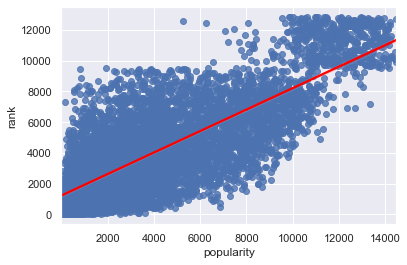

In [16]:
# ratings versus popularity regression plot
sb.set(color_codes=True)
ax = sb.regplot(x="popularity", y="rank", data=anime_df,line_kws={'color':'red'})

In [17]:
# anime_df sorted by rank
anime_sorted_rank_df = anime_df.sort_values(by=['rank'])
anime_sorted_rank_df

anime_id                                              title  \
1261      5114                   Fullmetal Alchemist: Brotherhood   
529      32281                                     Kimi no Na wa.   
639      28977                                           Gintama°   
2953     30484                                      Steins;Gate 0   
1475      9253                                        Steins;Gate   
...        ...                                                ...   
6575     19857  Kagachi-sama Onagusame Tatematsurimasu: Netora...   
6581      5054  Kojin Jugyou The Animation: Schoolgirl Ready f...   
6602      3050                                   Panchira Teacher   
6619     13595             Suki de Suki de, Suki de The Animation   
6663     37405                            Dokidoki Little Ooyasan   

                         title_english  \
1261  Fullmetal Alchemist: Brotherhood   
529                         Your Name.   
639                   Gintama Season 4   
2953                               NaN   
1475                       Steins;Gate   
...                                ...   
6575                               NaN   
6581                               NaN   
6602               Panty Flash Teacher   
6619                               NaN   
6663                               NaN   

                                         title_japanese  \
1261                         鋼の錬金術師 FULLMETAL ALCHEMIST   
529                                               君の名は。   
639                                                 銀魂°   
2953                                      シュタインズ・ゲート ゼロ   
1475                                        STEINS;GATE   
...                                                 ...   
6575               かがち様お慰め奉ります ~寝取られ村淫夜噺~ THE ANIMATION   
6581  個人授業 THE ANIMATION～Schoolgirl ready for a priv...   
6602                                         パンチラティーチャー   
6619                          好きで好きで, すきで THE ANIMATION   
6663                                    dokidokiりとる大家さん   

                                         title_synonyms  \
1261  Hagane no Renkinjutsushi: Fullmetal Alchemist,...   
529                                                 NaN   
639                                Gintama&#039; (2015)   
2953                                   Steins,Gate Zero   
1475                                                NaN   
...                                                 ...   
6575                                                NaN   
6581                                       Kojin Jugyou   
6602                                                NaN   
6619                                                NaN   
6663                                                NaN   

                                              image_url   type        source  \
1261  https://myanimelist.cdn-dena.com/images/anime/...     TV         Manga   
529   https://myanimelist.cdn-dena.com/images/anime/...  Movie      Original   
639   https://myanimelist.cdn-dena.com/images/anime/...     TV         Manga   
2953  https://myanimelist.cdn-dena.com/images/anime/...     TV  Visual novel   
1475  https://myanimelist.cdn-dena.com/images/anime/...     TV  Visual novel   
...                                                 ...    ...           ...   
6575  https://myanimelist.cdn-dena.com/images/anime/...    OVA  Visual novel   
6581  https://myanimelist.cdn-dena.com/images/anime/...    OVA         Manga   
6602  https://myanimelist.cdn-dena.com/images/anime/...    OVA      Original   
6619  https://myanimelist.cdn-dena.com/images/anime/...    OVA         Manga   
6663  https://myanimelist.cdn-dena.com/images/anime/...    OVA         Other   

      episodes            status  ...                  broadcast  \
1261        64   Finished Airing  ...     Sundays at 17:00 (JST)   
529          1   Finished Airing  ...                        NaN   
639         51   Finished Airing  ...  Wednesdays at 18:00 (JST)   
2953        23  Curre

In [18]:
# anime_df sorted by popularity
anime_sorted_popularity_df = anime_df.sort_values(by=['popularity'])
anime_sorted_popularity_df

anime_id                                              title  \
3802      1535                                         Death Note   
3897     16498                                 Shingeki no Kyojin   
3009     11757                                   Sword Art Online   
1261      5114                   Fullmetal Alchemist: Brotherhood   
4215     30276                                      One Punch Man   
...        ...                                                ...   
6648     37859  Free! Movie 2: Timeless Medley - Yakusoku: Cha...   
6644     37860    Free!: Take Your Marks: Character Butai Aisatsu   
6640     37814     Inazuma Eleven Reloaded: Reformation of Soccer   
6659     37493                              Watashitachi no Mirai   
6661     37494                             Chikyuu to no Yakusoku   

                         title_english  \
3802                        Death Note   
3897                   Attack on Titan   
3009                  Sword Art Online   
1261  Fullmetal Alchemist: Brotherhood   
4215                     One Punch Man   
...                                ...   
6648                               NaN   
6644                               NaN   
6640                               NaN   
6659                               NaN   
6661                               NaN   

                                title_japanese  \
3802                                     デスノート   
3897                                     進撃の巨人   
3009                              ソードアート・オンライン   
1261                鋼の錬金術師 FULLMETAL ALCHEMIST   
4215                                    ワンパンマン   
...                                        ...   
6648  劇場版 Free!-Timeless Medley- 約束 キャラクター舞台挨拶   
6644     特別版 Free!-Take Your Marks- キャラクター舞台挨拶   
6640             イナズマイレブン リローデッド ～サッカーの変革へんかく～   
6659                                    私たちの未来   
6661                                    地球との約束   

                                         title_synonyms  \
3802                                                 DN   
3897                                                AoT   
3009                                         S.A.O, SAO   
1261  Hagane no Renkinjutsushi: Fullmetal Alchemist,...   
4215                  One Punch-Man, One-Punch Man, OPM   
...                                                 ...   
6648                                                NaN   
6644                                                NaN   
6640                                                NaN   
6659                                                NaN   
6661                                                NaN   

                                              image_url     type       source  \
3802  https://myanimelist.cdn-dena.com/images/anime/...       TV        Manga   
3897  https://myanimelist.cdn-dena.com/images/anime/...       TV        Manga   
3009  https://myanimelist.cdn-dena.com/images/anime/...       TV  Light novel   
1261  https://myanimelist.cdn-dena.com/images/anime/...       TV        Manga   
4215  https://myanimelist.cdn-dena.com/images/anime/...       TV    Web manga   
...                                                 ...      ...          ...   
6648  https://myanimelist.cdn-dena.com/images/anime/...    Movie     Original   
6644  https://myanimelist.cdn-dena.com/images/anime/...    Movie     Original   
6640  https://myanimelist.cdn-dena.com/images/anime/...  Special         Game   
6659  https://myanimelist.cdn-dena.com/images/anime/...      OVA     Original   
6661  https://myanimelist.cdn-dena.com/images/anime/...      OVA     Original   

      episodes           status  ...                  broadcast  \
3802        37  Finished Airing  ...  Wednesdays at 00:56 (JST)   
3897        25  Finished Airing  ...     Sundays at 01:58 (JST)   
3009        25  Finished Airing  ...     Sundays at 00:00 (JST)   
1261        64  Finished Airing  ...     Sundays at 17:00 (JST)   
4215        12  Finished Airing  ...     Mondays at 01

Because we are primarily concerned with how highly rated an anime is, we will be focussing on the rank of an anime. In the following section, it is further established that popular anime is generally high in rank.

#### **1.1.1** Correlation of Feature Variables

These are correlation tables for the quantatative variables that we will use for analysis.

anime_id  episodes    airing     score  scored_by      rank  \
anime_id         1.000000 -0.109610  0.223734 -0.223733  -0.046057  0.274671   
episodes        -0.109610  1.000000 -0.037289  0.076875   0.068544 -0.049064   
airing           0.223734 -0.037289  1.000000 -0.066910  -0.046482  0.100467   
score           -0.223733  0.076875 -0.066910  1.000000   0.381926 -0.898747   
scored_by       -0.046057  0.068544 -0.046482  0.381926   1.000000 -0.356686   
rank             0.274671 -0.049064  0.100467 -0.898747  -0.356686  1.000000   
popularity       0.205813 -0.009545  0.079229 -0.688492  -0.425719  0.777302   
members         -0.032301  0.079572 -0.030711  0.415626   0.987107 -0.391524   
favorites       -0.054066  0.106804 -0.004717  0.256094   0.793949 -0.208503   
duration_min    -0.205838 -0.105711 -0.086957  0.298989   0.046203 -0.294528   
aired_from_year  0.623290 -0.147920  0.142681  0.042159   0.110892 -0.063543   

                 popularity   members  favorites  duration_min  \
anime_id           0.205813 -0.032301  -0.054066     -0.205838   
episodes          -0.009545  0.079572   0.106804     -0.105711   
airing             0.079229 -0.030711  -0.004717     -0.086957   
score             -0.688492  0.415626   0.256094      0.298989   
scored_by         -0.425719  0.987107   0.793949      0.046203   
rank               0.777302 -0.391524  -0.208503     -0.294528   
popularity         1.000000 -0.474798  -0.210745     -0.159596   
members           -0.474798  1.000000   0.781565      0.039457   
favorites         -0.210745  0.781565   1.000000      0.002669   
duration_min      -0.159596  0.039457   0.002669      1.000000   
aired_from_year   -0.236951  0.135725   0.031254     -0.183812   

                 aired_from_year  
anime_id                0.623290  
episodes               -0.147920  
airing                  0.142681  
score                   0.042159  
scored_by               0.110892  
rank                   -0.063543  
popularity             -0.236951  
members                 0.135725  
favorites               0.031254  
duration_min           -0.183812  
aired_from_year         1.000000

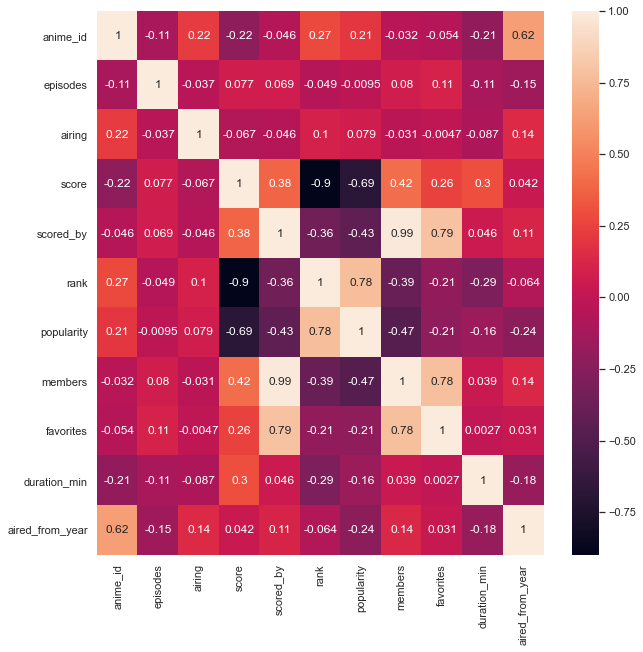

In [19]:
anime_corr = anime_df.corr(method='pearson')

# heatmap for easier visualization
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(anime_corr, annot=True)

# correlation matrix
anime_corr

As we can see in the correlation matrix above, the correlation between rank and popularity is 0.777302, indicating that there is a significant association between the rank of an anime and its popularity. 

#### **1.1.2** Statistics for Each Column

In [20]:
anime_df.describe()

anime_id     episodes        score     scored_by          rank  \
count   6668.000000  6668.000000  6668.000000  6.668000e+03   6312.000000   
mean   15064.977804    14.276395     6.848998  2.403501e+04   4327.645120   
std    13161.364001    40.906929     0.927448  6.112103e+04   3170.699074   
min        1.000000     0.000000     0.000000  0.000000e+00      1.000000   
25%     2592.000000     1.000000     6.350000  6.812500e+02   1710.750000   
50%    10401.500000     6.000000     6.930000  3.966000e+03   3754.500000   
75%    30301.250000    13.000000     7.460000  1.976075e+04   6338.500000   
max    37896.000000  1818.000000     9.520000  1.009477e+06  12856.000000   

         popularity       members      favorites  duration_min  \
count   6668.000000  6.668000e+03    6668.000000   6668.000000   
mean    4479.515897  4.749037e+04     670.365627     28.442167   
std     3453.338080  1.051211e+05    3823.072834     25.365980   
min        1.000000  1.800000e+01       0.000000      0.000000   
25%     1691.750000  2.222750e+03       3.000000     17.000000   
50%     3629.500000  1.033650e+04      21.000000     24.000000   
75%     6630.250000  4.336000e+04     142.000000     27.000000   
max    14468.000000  1.456378e+06  106895.000000    163.000000   

       aired_from_year  
count      6668.000000  
mean       2006.915267  
std          10.381425  
min        1942.000000  
25%        2003.000000  
50%        2010.000000  
75%        2015.000000  
max        2018.000000

### **1.2** Score Distribution of All Data

This is the distribution of scores created by the users according to the dataframe. The average score is **6.848998200359928** for all scores according to the distribution prior to feature selection and data processing.

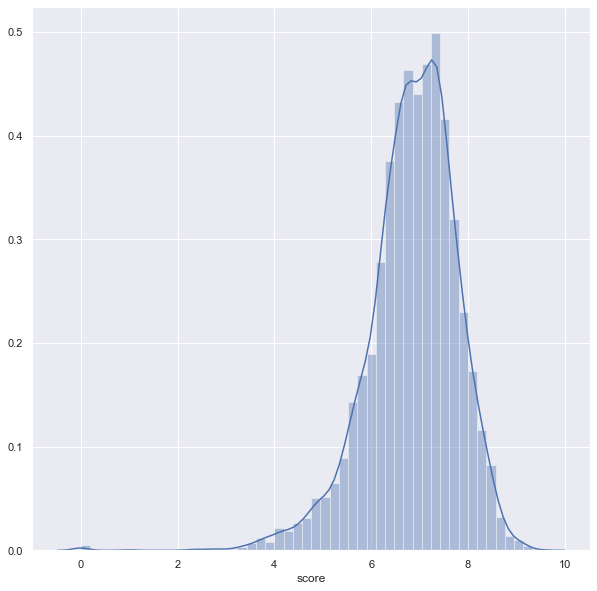

In [21]:
# distribution plot of scores
ax = sb.distplot(anime_df['score'])

In [22]:
# mean of scores
average_score = anime_df['score'].mean()
average_score

6.848998200359928

### **1.3** Scores and Rank by Categorical Variables
We want to visualize the categorical variables that can contribute to an anime's popularity.

Here, we see the distribution and means of the categorical variables that I think have the most impact on an anime's popularity, which are:
1. Genre
2. Production Studio
3. Year of Airing
4. Source
5. Name of Anime

Note that the Name of Anime categorical variable depends on the viewer Animelists and ratings, which will require merging `anime_df` and `animelist_df`.

#### **1.3.1** Genres
Each anime can be categorized by a variety of genres. Like all media, genres vary in consumption; however, for anime in particular, genre is much more diverse and taste-specific. We provide some further analysis on genre below.

In [23]:
# boxplot of mean scores per genre
# NOTE: click to enlarge for detailed view
sb.set(rc={'figure.figsize':(700,60)})
sb.set(style="whitegrid")
ax = sb.boxplot(x='genre', y='score', data=merged_anime_df)

In [24]:
# entries per genre
genre_counts = merged_anime_df['genre'].value_counts()
all_genres = merged_anime_df['genre'].unique()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(all_genres, genre_counts)
plt.show()

Because some genres appear to be more popular than other genres in terms of content and reviews, we will be using genres in our analysis.

#### **1.3.2** Production Studio
The studio that produces the anime determines the animation style, marketing tactics, and other factors that may contribute to an anime's popularity.

In [25]:
# boxplot of mean scores per studio
# NOTE: click on image to enlarge for detailed view
sb.set(style="whitegrid")
sb.set(rc={'figure.figsize':(700,60)})
ax = sb.boxplot(x='studio', y='score', data=merged_anime_df)

In [26]:
# sorted by the highest ranked production studio
anime_studio_means = anime_df[['rank','studio']].groupby(['studio']).mean()
anime_studio_means = anime_studio_means.sort_values(by=['rank'])
anime_studio_means

rank
studio                                
Artland, Magic Bus                 6.0
J.C.Staff, Egg Firm               65.5
Studio Chizu                      68.0
Madhouse, Satelight, Graphinica   92.0
Xebec, AIC                       131.0
...                                ...
Sugar Boy, Blue Cat                NaN
Suzuki Mirano                      NaN
T-Rex                              NaN
Triple X                           NaN
Y.O.U.C                            NaN

[711 rows x 1 columns]

In [27]:
# number of anime produced by each studio
anime_year_counts = anime_df[['rank', 'studio']].groupby(['studio']).count()
anime_year_counts = anime_year_counts.sort_values(['rank'], ascending=False)
anime_year_counts

rank
studio                   
Toei Animation        403
Sunrise               277
Madhouse              241
Studio Pierrot        235
J.C.Staff             231
...                   ...
Chippai                 0
Circle Tribute          0
Majin                   0
Collaboration Works     0
Media Bank              0

[711 rows x 1 columns]

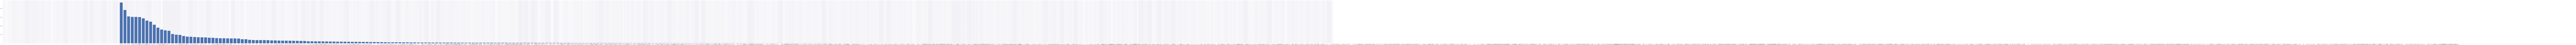

In [28]:
# entries per production studio

studio_counts = merged_anime_df['studio'].value_counts()
all_studios = merged_anime_df['studio'].unique()

sb.set(rc={'figure.figsize':(600,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(all_studios, studio_counts)
plt.show()

Because some production studios appear to have more impact on popularity in terms of entries, it is a worthwhile feature to consider in our analysis.

From the boxplot above, we can see that some studios produce anime that is more highly rated. As such, our modelling should include the studio as a categorical variable.

#### **1.3.3** Airing Year
The airing year refers to the year that the anime is released. Anime may have differing popularities depending on recency, and the following EDA serves to provide some analysis as to whether airing date affects rank or not.

In [29]:
# boxplot of mean scores per year
# NOTE: click on image to enlarge for detailed view
sb.set(rc={'figure.figsize':(300,60)})
ax = sb.boxplot(x='aired_from_year', y='score', data=anime_df)

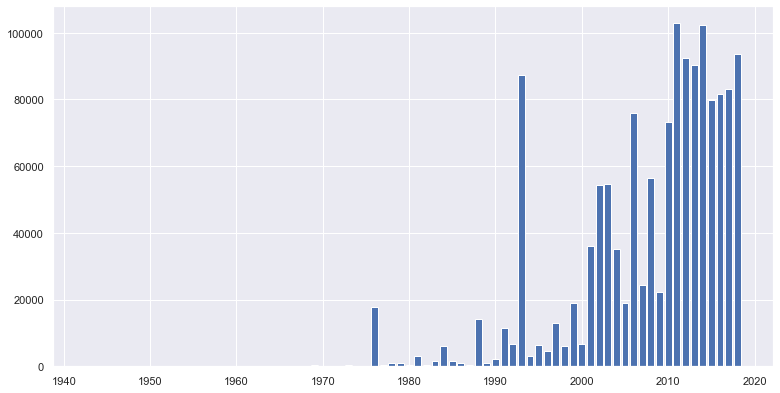

In [30]:
# entries per viewing year

year_counts = merged_anime_df['aired_from_year'].value_counts()
all_years = merged_anime_df['aired_from_year'].unique()

sb.set(rc={'figure.figsize':(10,5)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(all_years, year_counts)
plt.show()

In [31]:
# sorted by the highest ranked airing years
anime_year_means = anime_df[['rank', 'aired_from_year']].groupby(['aired_from_year']).mean()
anime_year_means = anime_year_means.sort_values(by=['rank'], ascending=True)
anime_year_means

rank
aired_from_year              
1978.0            3068.272727
2008.0            3143.991031
1995.0            3156.274194
2007.0            3435.382883
2005.0            3464.925714
...                       ...
1944.0            8749.000000
1943.0            8978.500000
1962.0            9606.000000
1942.0           10114.000000
1961.0           11453.000000

[66 rows x 1 columns]

In [32]:
# number of anime aired in each year
anime_year_counts = anime_df[['rank', 'aired_from_year']].groupby(['aired_from_year']).count()
anime_year_counts

rank
aired_from_year      
1942.0              1
1943.0              2
1944.0              1
1945.0              1
1957.0              1
...               ...
2014.0            403
2015.0            463
2016.0            546
2017.0            496
2018.0            191

[66 rows x 1 columns]

From the outputs of the box plots and the sorting by rank, it appears that there is not a significant impact of airing day on popularity. Thus, we will not be using airing date as a categorical variable in our analysis.

#### **1.3.4** Source

Source refers to the original source for the given anime (ie. the anime that the source was adapted from).

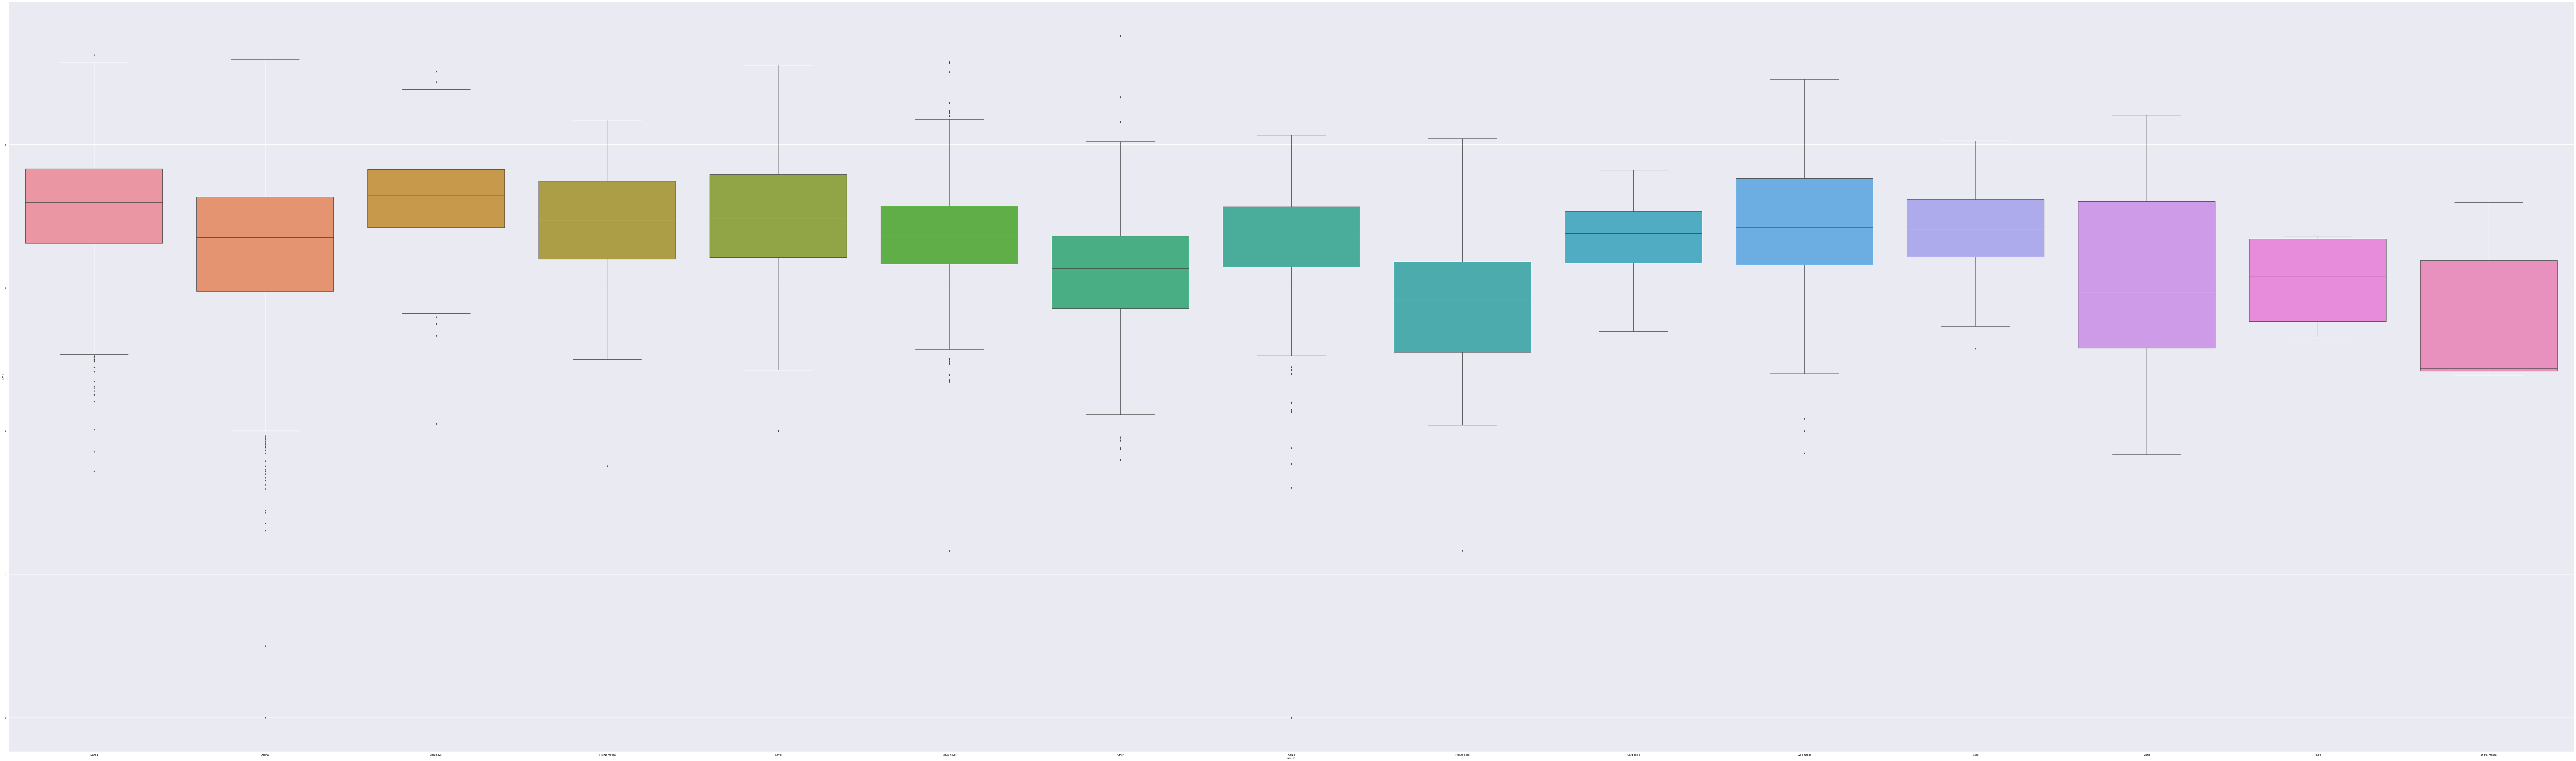

In [33]:
sb.set(rc={'figure.figsize':(200,60)})
ax = sb.boxplot(x='source', y='score', data=anime_df)

In [34]:
# sorted by the highest ranked sources
anime_source_means = anime_df[['rank', 'source']].groupby(['source']).mean()
anime_source_means = anime_year_means.sort_values(by=['rank'], ascending=True)
anime_source_means

rank
aired_from_year              
1978.0            3068.272727
2008.0            3143.991031
1995.0            3156.274194
2007.0            3435.382883
2005.0            3464.925714
...                       ...
1944.0            8749.000000
1943.0            8978.500000
1962.0            9606.000000
1942.0           10114.000000
1961.0           11453.000000

[66 rows x 1 columns]

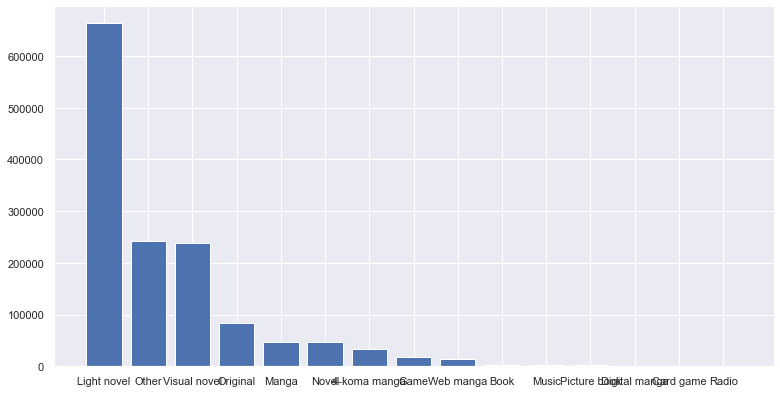

In [35]:
# entries per source
source_counts = merged_anime_df['source'].value_counts()
all_sources = merged_anime_df['source'].unique()

sb.set(rc={'figure.figsize':(10,5)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(all_sources, source_counts)
plt.show()

Because it appears that some sources are significantly more popular than others, this is a worthwile variable to consider.

### **1.4** Title Frequency

This is for evaluation of ratings per title by users per anime title.

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9734 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9678 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9651 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9825 missing from current font.
  font.set_text(s

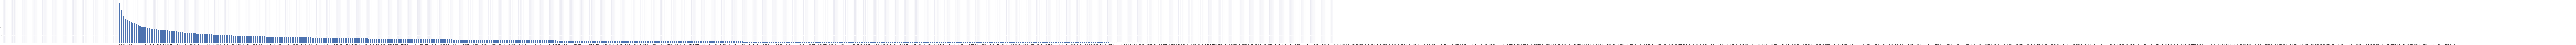

In [36]:
title_counts = merged_anime_df['title'].value_counts()
all_titles = merged_anime_df['title'].unique()

sb.set(rc={'figure.figsize':(600,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(all_titles, title_counts)
plt.show()

As shown from the distribution, some titles are more popular than others. As such, we will be using title as a categorical variable in our analysis.

### **1.5** General Predictions

Based on our exploratory data analytics, we predict that:
* The categorical variables Title, Source, Genre, and Production Studio will have the most contribution as features for our models as seen from the data visualizations.
* The numerical variables Favorites, Popularity, and Members will have the most contribution as features for our models as seen from the correlation matrix.

## **2.** Feature Selection/Extraction

### **2.1** Dropping Uncessary Categorical Variables
We are dropping all categorical variables that are not discussed in the EDA section above.

In [37]:
# dropping uncessary features
# new_anime_df = merged_anime_df.groupby(['source'])
new_anime_df = merged_anime_df[['anime_id', 'username', 'title', 'score', 'scored_by', 'rank', 'popularity', 'members', 'source', 'favorites', 'studio', 'genre']]
new_anime_df

anime_id        username  \
28282899     10020       Zukin-Man   
28282899     10020       Zukin-Man   
19028665     19111        AluPachi   
19028665     19111        AluPachi   
19028665     19111        AluPachi   
...            ...             ...   
3675087       5630  Serzhunya_Baka   
22444655     32902      TigreDemon   
22444655     32902      TigreDemon   
22444655     32902      TigreDemon   
22444655     32902      TigreDemon   

                                                      title  score  scored_by  \
28282899  Ore no Imouto ga Konnani Kawaii Wake ga Nai Sp...   7.57      83849   
28282899  Ore no Imouto ga Konnani Kawaii Wake ga Nai Sp...   7.57      83849   
19028665          Love Live! School Idol Project 2nd Season   7.99      79740   
19028665          Love Live! School Idol Project 2nd Season   7.99      79740   
19028665          Love Live! School Idol Project 2nd Season   7.99      79740   
...                                                     ...    ...        ...   
3675087                                     Higashi no Eden   7.96     173942   
22444655              Mahoutsukai no Yome: Hoshi Matsu Hito   8.26      61403   
22444655              Mahoutsukai no Yome: Hoshi Matsu Hito   8.26      61403   
22444655              Mahoutsukai no Yome: Hoshi Matsu Hito   8.26      61403   
22444655              Mahoutsukai no Yome: Hoshi Matsu Hito   8.26      61403   

            rank  popularity  members       source  favorites          studio  \
28282899  1435.0         658   127176  Light novel        176       AIC Build   
28282899  1435.0         658   127176  Light novel        176       AIC Build   
19028665   570.0         599   138715        Other       2475         Sunrise   
19028665   570.0         599   138715        Other       2475         Sunrise   
19028665   570.0         599   138715        Other       2475         Sunrise   
...          ...         ...      ...          ...        ...             ...   
3675087    599.0         156   346202     Original       3733  Production I.G   
22444655   270.0         536   150617        Manga        553      Wit Studio   
22444655   270.0         536   150617        Manga        553      Wit Studio   
22444655   270.0         536   150617        Manga        553      Wit Studio   
22444655   270.0         536   150617        Manga        553      Wit Studio   

                   genre  
28282899   Slice of Life  
28282899          Comedy  
19028665           Music  
19028665          School  
19028665   Slice of Life  
...                  ...  
3675087         Thriller  
22444655   Slice of Life  
22444655           Magic  
22444655         Fantasy  
22444655         Shounen  

[1394111 rows x 12 columns]

### **2.2** Encoding Categorical Variables

We have to encode the categorical variables also going to be used for our analysis. This includes:
* Genre
* Studio
* Source
* Title of Anime

Each one-hot encoding contains the mappings that correspond to each categorical feature, listed in each encoding.

In [38]:
# genre
encoder = LabelEncoder()

genre_labels = encoder.fit_transform(new_anime_df['genre'])

# mappings
genre_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}

In [39]:
# studio

studio_labels = encoder.fit_transform(new_anime_df['studio'])

# mappings
studio_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
studio_mappings # from the output, there are 710 studios in total

{0: '10Gauge',
 1: '2:10 Animation',
 2: '8bit',
 3: 'A-1 Pictures',
 4: 'A-1 Pictures, Bridge',
 5: 'A-1 Pictures, CloverWorks',
 6: 'A-1 Pictures, Ordet',
 7: 'A-1 Pictures, TROYCA',
 8: 'A-1 Pictures, Trigger, CloverWorks',
 9: 'A-Real',
 10: 'A.C.G.T.',
 11: 'ACC Production',
 12: 'AIC',
 13: 'AIC A.S.T.A.',
 14: 'AIC Build',
 15: 'AIC Classic',
 16: 'AIC Frontier',
 17: 'AIC Plus+',
 18: 'AIC Spirits',
 19: 'AIC Spirits, Asread',
 20: 'AIC Spirits, BeSTACK',
 21: 'AIC Spirits, Digital Frontier',
 22: 'AIC Spirits, Group TAC',
 23: 'AIC Takarazuka',
 24: 'AIC, APPP',
 25: 'AIC, Animate Film',
 26: 'AIC, Artmic',
 27: 'AIC, Artmic, Animate Film',
 28: 'AIC, Artmic, Darts',
 29: 'AIC, BeSTACK',
 30: 'AIC, Darts',
 31: 'AIC, Remic',
 32: 'APPP',
 33: 'AT-2',
 34: 'AXsiZ',
 35: 'Actas',
 36: 'Actas, Bee Media',
 37: 'Actas, Studio 3Hz',
 38: 'Actas, SynergySP',
 39: 'Agent 21',
 40: 'Ajia-Do',
 41: 'Ajia-Do, Group TAC',
 42: 'Ajia-Do, Studio Deen',
 43: 'An DerCen',
 44: 'Animaruya',
 

In [40]:
# source
source_labels = encoder.fit_transform(new_anime_df['source'])

# mappings
source_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
source_mappings

{0: '4-koma manga',
 1: 'Book',
 2: 'Card game',
 3: 'Digital manga',
 4: 'Game',
 5: 'Light novel',
 6: 'Manga',
 7: 'Music',
 8: 'Novel',
 9: 'Original',
 10: 'Other',
 11: 'Picture book',
 12: 'Radio',
 13: 'Visual novel',
 14: 'Web manga'}

In [41]:
# title
title_labels = encoder.fit_transform(new_anime_df['title'])

# mappings
title_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
title_mappings

{0: '"Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi',
 1: '"Bungaku Shoujo" Memoire',
 2: '"Bungaku Shoujo" Movie',
 3: '"Eikou Naki Tensai-tachi" Kara no Monogatari',
 4: '"Eiyuu" Kaitai',
 5: '.hack//G.U. Returner',
 6: '.hack//Gift',
 7: '.hack//Intermezzo',
 8: '.hack//Liminality',
 9: '.hack//Quantum',
 10: '.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!',
 11: '.hack//Roots',
 12: '.hack//Sign',
 13: '.hack//Tasogare no Udewa Densetsu',
 14: '.hack//Unison',
 15: '009-1',
 16: '07-Ghost',
 17: '1+2=Paradise',
 18: '100% Pascal-sensei (TV)',
 19: '1000-nen Joou: Queen Millennia',
 20: '11eyes',
 21: '11eyes Picture Drama',
 22: '11eyes: Momoiro Genmutan',
 23: '12-sai.',
 24: '12-sai. 2nd Season',
 25: '12-sai.: Chicchana Mune no Tokimeki',
 26: '12-sai.: Chicchana Mune no Tokimeki 2nd Season',
 27: '15 Bishoujo Hyouryuuki',
 28: '18if',
 29: '21-ji no Onna: Newscaster Katsuragi Miki',
 30: '25-sai no Joshikousei',
 31: '3-Nen D-Gumi Glass no Kamen',
 32: '3-gatsu no Lion',
 33:

In [42]:
pd.options.mode.chained_assignment = None

new_anime_df['genre_labels'] = genre_labels
new_anime_df['studio_labels'] = studio_labels
new_anime_df['source_labels'] = source_labels
new_anime_df['title_labels'] = title_labels

### **2.3** Score Threshold

#### **2.3.1** Updated Correlations
We want to observe the correlations to determine if there exists significant linear relationships between some feature variables and others.

anime_id     score  scored_by      rank  popularity   members  \
anime_id       1.000000 -0.056136  -0.018370  0.076072   -0.048129 -0.009124   
score         -0.056136  1.000000   0.476170 -0.945736   -0.514523  0.510472   
scored_by     -0.018370  0.476170   1.000000 -0.400186   -0.518255  0.988660   
rank           0.076072 -0.945736  -0.400186  1.000000    0.525179 -0.433211   
popularity    -0.048129 -0.514523  -0.518255  0.525179    1.000000 -0.566632   
members       -0.009124  0.510472   0.988660 -0.433211   -0.566632  1.000000   
favorites     -0.111830  0.485598   0.835696 -0.346047   -0.331190  0.837718   
genre_labels   0.051214 -0.003841  -0.033190  0.002288    0.034498 -0.031599   
studio_labels -0.063583  0.007737  -0.064856 -0.013979    0.085220 -0.077080   
source_labels -0.074554 -0.018336  -0.010592  0.053210    0.060138 -0.011001   
title_labels   0.018399 -0.006193  -0.055522 -0.005892    0.045310 -0.058112   

               favorites  genre_labels  studio_labels  source_labels  \
anime_id       -0.111830      0.051214      -0.063583      -0.074554   
score           0.485598     -0.003841       0.007737      -0.018336   
scored_by       0.835696     -0.033190      -0.064856      -0.010592   
rank           -0.346047      0.002288      -0.013979       0.053210   
popularity     -0.331190      0.034498       0.085220       0.060138   
members         0.837718     -0.031599      -0.077080      -0.011001   
favorites       1.000000     -0.025142      -0.024267       0.037612   
genre_labels   -0.025142      1.000000      -0.010276       0.036794   
studio_labels  -0.024267     -0.010276       1.000000       0.062687   
source_labels   0.037612      0.036794       0.062687       1.000000   
title_labels   -0.062049     -0.008467       0.017859      -0.023270   

               title_labels  
anime_id           0.018399  
score             -0.006193  
scored_by         -0.055522  
rank              -0.005892  
popularity         0.045310  
members           -0.058112  
favorites         -0.062049  
genre_labels      -0.008467  
studio_labels      0.017859  
source_labels     -0.023270  
title_labels       1.000000

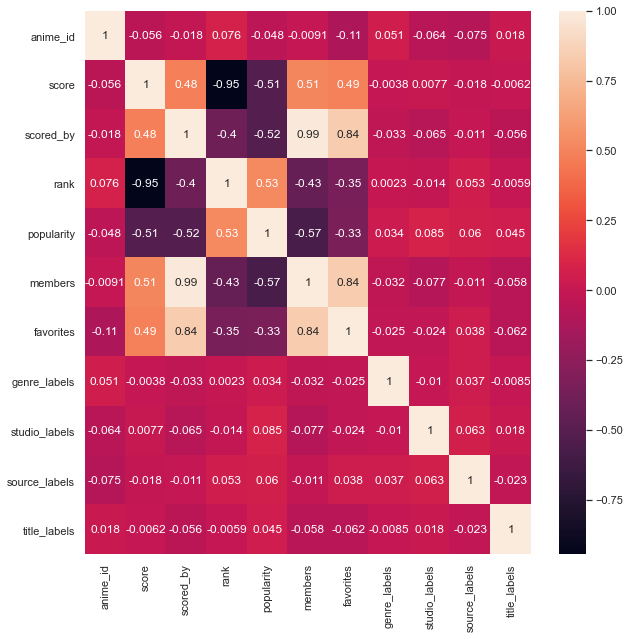

In [43]:
# updated correlation heatmap based on feature variables
updated_anime_corr = new_anime_df.corr(method='pearson')

# heatmap for easier visualization
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(updated_anime_corr, annot=True)

# correlation matrix
updated_anime_corr

#### **2.3.2** Score Mean Threshold

Because the feature variables yielded little correlation to the outcome variable (ie. score), we are only going to investigate the anime whose rating pass a threshold. We denote these anime with a binary measure, denoted `above_average`, added to `new_anime_df`.

In [ ]:
anime_df['score'].mean()

In [45]:
# average score is 7.58
# 1 for above average score, 0 for below
pd.options.mode.chained_assignment = None
new_anime_df['above_average'] = np.where(new_anime_df['score'] >= 7.58, '1', '0')
new_anime_df

anime_id        username  \
28282899     10020       Zukin-Man   
28282899     10020       Zukin-Man   
19028665     19111        AluPachi   
19028665     19111        AluPachi   
19028665     19111        AluPachi   
...            ...             ...   
3675087       5630  Serzhunya_Baka   
22444655     32902      TigreDemon   
22444655     32902      TigreDemon   
22444655     32902      TigreDemon   
22444655     32902      TigreDemon   

                                                      title  score  scored_by  \
28282899  Ore no Imouto ga Konnani Kawaii Wake ga Nai Sp...   7.57      83849   
28282899  Ore no Imouto ga Konnani Kawaii Wake ga Nai Sp...   7.57      83849   
19028665          Love Live! School Idol Project 2nd Season   7.99      79740   
19028665          Love Live! School Idol Project 2nd Season   7.99      79740   
19028665          Love Live! School Idol Project 2nd Season   7.99      79740   
...                                                     ...    ...        ...   
3675087                                     Higashi no Eden   7.96     173942   
22444655              Mahoutsukai no Yome: Hoshi Matsu Hito   8.26      61403   
22444655              Mahoutsukai no Yome: Hoshi Matsu Hito   8.26      61403   
22444655              Mahoutsukai no Yome: Hoshi Matsu Hito   8.26      61403   
22444655              Mahoutsukai no Yome: Hoshi Matsu Hito   8.26      61403   

            rank  popularity  members       source  favorites          studio  \
28282899  1435.0         658   127176  Light novel        176       AIC Build   
28282899  1435.0         658   127176  Light novel        176       AIC Build   
19028665   570.0         599   138715        Other       2475         Sunrise   
19028665   570.0         599   138715        Other       2475         Sunrise   
19028665   570.0         599   138715        Other       2475         Sunrise   
...          ...         ...      ...          ...        ...             ...   
3675087    599.0         156   346202     Original       3733  Production I.G   
22444655   270.0         536   150617        Manga        553      Wit Studio   
22444655   270.0         536   150617        Manga        553      Wit Studio   
22444655   270.0         536   150617        Manga        553      Wit Studio   
22444655   270.0         536   150617        Manga        553      Wit Studio   

                   genre  genre_labels  studio_labels  source_labels  \
28282899   Slice of Life            74             14              5   
28282899          Comedy             3             14              5   
19028665           Music            62            523             10   
19028665          School            27            523             10   
19028665   Slice of Life            34            523             10   
...                  ...           ...            ...            ...   
3675087         Thriller            39            377              9   
22444655   Slice of Life            74            608              6   
22444655           Magic            16            608              6   
22444655         Fantasy             8            608              6   
22444655         Shounen            32            608              6   

          title_labels above_average  
28282899          3965             0  
28282899          3965             0  
19028665          3056             1  
19028665          3056             1  
19028665          3056             1  
...                ...           ...  
3675087           2071             1  
22444655          3220             1  
22444655          3220             1  
22444655          3220             1  
22444655          3220             1  

[1394111 rows x 17 columns]

## **3.** Modelling 
Finally, we want to train models as predictive measures for our data. 
* For our baseline model, we are using a **Naive Bayes Classifier**.
* We will use **Random Forest** as our first classifier algorithm.
* Finally, we will use **Multi-Layer Perceptron** as a feed-foward neural network classifier.

### **3.1** Baseline Model: Naive Bayes
We first train a Naive Bayes classifier as our baseline model.

#### **3.1.1** Training and Test Sets
We are splitting our training and test data in a 70-30 split. The features are the categorical one-hot encoded variables as dicussed above, and the lables is the binary indicator we constructed above, `above_average`, indicating whether or not an anime is above average.

In [86]:
features = new_anime_df[['title_labels', 'scored_by', 'popularity', 'members', 'source_labels', 'favorites', 'studio_labels', 'genre_labels']].copy()
labels = new_anime_df['above_average']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

#### **3.1.2** Naive Bayes

In [116]:
# model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

In [118]:
# comparison of output values
gnb_df = pd.DataFrame({'actual': y_test.values.flatten(), 'predicted': y_pred.flatten()})
gnb_df

actual predicted
0           0         0
1           1         1
2           0         0
3           1         1
4           1         1
...       ...       ...
209112      1         0
209113      1         0
209114      0         0
209115      1         1
209116      1         1

[209117 rows x 2 columns]

In [119]:
joblib.dump(gnb, './parameters/gnb.pkl')

['./parameters/gnb.pkl']

In [120]:
# accuracy evaluations
print (accuracy_score(y_test, y_pred))

0.6927413840099084


As seen from the accuracy score, our baseline model provides an accuracy of 0.6927413840099084. 

### **3.2** Random Forest Classifier

#### **3.2.1** PCA
First, to reduce overfitting, we want to use Principal Component Analysis for dimensionality reduction to determine the optimal number of components we should use for analysis for our dataset.

We want to conduct dimensionality reduction primarily because we want to investigate independent variables as contributers to anime popularity. It is less useful for a factor that is hinged on other factors to potentially contribute to better classification than investigating independent variables that contribute instead.

[0.38935563 0.52509392 0.65271226 0.77581247 0.89016238 0.97733897
 0.99883014 1.        ]


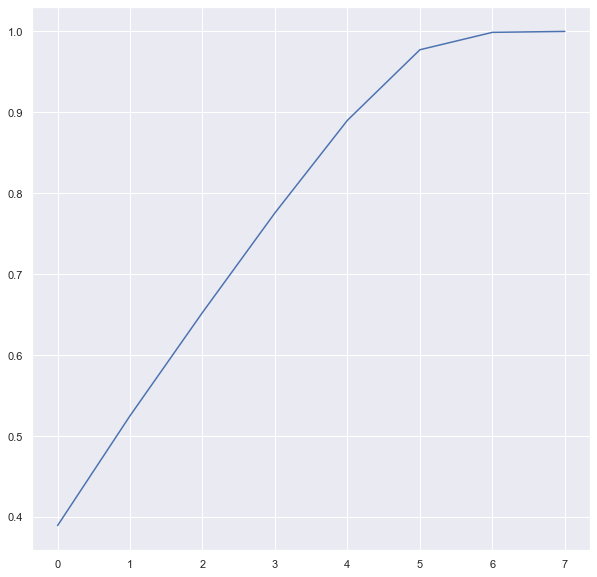

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_temp = pd.DataFrame(x_train)
x_temp

x_train_pca = StandardScaler().fit_transform(x_temp)
pca = PCA()
train_2 = pca.fit_transform(x_train_pca)

np.set_printoptions(suppress=True)
pca.explained_variance_ratio_
pca.components_

pcaplot = np.cumsum((pca.explained_variance_ratio_))
plt.plot(pcaplot)
print(pcaplot)

In [92]:
pca2 = PCA(n_components = 6)
x_train = pca2.fit_transform(x_train)

#### **3.2.2** Random Forest Model
We train and fit our RF Classifier as follows.

In [93]:
# print out best parameters
def print_best_params(results):
    print('best_params: {}\n'.format(results.best_params_))

In [123]:
# classifier
rf = RandomForestClassifier()
parameters = {
    'max_depth': [10, 20],
    'n_estimators': [16, 32, 64]
}

rf_cv = GridSearchCV(rf, parameters, cv=5)
rf_cv.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [124]:
print_best_params(rf_cv)

best_params: {'max_depth': 20, 'n_estimators': 64}



As shown from the `best_params` output, a max depth of 20 and n_estimators of 64 provides the best model.

To effectively evaluate the effectivness of our models, we want to save them locally such that we can access them later to compare using validation sets.

In [125]:
# saving model for validation
joblib.dump(rf_cv.best_estimator_, './parameters/rf.pkl')

['./parameters/rf.pkl']

#### **3.2.3** Fitting Random Forest

In [126]:
x_test = pca2.fit_transform(x_test)

In [129]:
# fitting with best parameters
rf_model = RandomForestClassifier(n_estimators=64, max_depth=20, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

In [131]:
# evaluation metrics

accuracy = accuracy_score(y_test, rf_pred)
print(accuracy)

0.9873467962910715


We get an exceptionally high accuracy score, which can indicate that the model is overfitting. However, for the scope of this project, because we used PCA to reduce features as much as possible, further hyperparameter tuning could potentially provide a better gauge of the accuracy score. 

*However, (unfortunately) my computer cannot run with `n_estimators` larger than ~100 without taking forever.*

#### **3.2.4** Relative Importance of Input Variables

In [132]:
new_columns = []
for name, val in zip(features.columns, rf_model.feature_importances_):
    print(name, ": ", val)
    new_columns.append(name)

title_labels :  0.26960171774623626
scored_by :  0.16937148337351987
popularity :  0.19204443409369432
members :  0.10901924860238457
source_labels :  0.1519574819744588
favorites :  0.10800563420970627


More dialogue on these outputs will be in the conclusion.

### **3.3** Multilayer Perceptron

Multilayer Perceptrons (MLP) are a class of feed-forward neural networks, meant to emulate the neurophysiological process by whic hthe brain processes and stores information.

**Hyperparameters:** to optimize for our model, we are going to use `hidden_layer_sizes`, which refers to the number of nodes in some hidder layer, and `activation` as the activation function.

**Activation function:** we want to use sigmoid activation functions and a rectified linear unit activation function.
* *Logistic:* uses a sigmoid function and is purposed if we want to predict the probability as an output. 
* *Rectified Linear Unit (ReLU):* ReLU is the most used activation function to date with a reduced likelihood of a vanishing gradient in comparison to a sigmoid activation function, in addition to sparsity such that the representation is less dense than a sigmoid function and thus mitigates overfitting.
* *Tanh:* the gradient is stronger than logistic, but is useful for classification purposes.

**Hidden layers:** because our data is not linearly separable, we want to include hidden layers. We are using the same size for all hidden layers, with the first hidden layer larger than the input layer but smaller than the output layer.

#### **3.3.1** MLP

In [100]:
mlp = MLPClassifier()

In [101]:
parameters = {
    'hidden_layer_sizes': [(5,), (10,), (50,)],
    'activation': ['logistic', 'relu', 'tanh']
}

In [102]:
mlp_cv = GridSearchCV(mlp, parameters, cv=5)
mlp_cv.fit(x_train, y_train.values.ravel())

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [103]:
# saving model for validation
joblib.dump(mlp_cv.best_estimator_, './parameters/mlp.pkl')

['./parameters/mlp.pkl']

In [104]:
mlp_model = MLPClassifier()
mlp_model.fit(x_train, y_train)
mlp_predicted_values = mlp_model.predict(x_test)

# evaluation metrics
score = accuracy_score(y_test, mlp_predicted_values)
print(score)

0.7989450881563909


In [105]:
print_best_params(mlp_cv)

best_params: {'activation': 'relu', 'hidden_layer_sizes': (50,)}



The accuracy score for MLP is lower than our Random Forest model. As a result of how MLP models cycle through data, it is also important to assess the model's performance after distinct epochs. The decrease in accuracy likely occurs because the validation loss starts to increase, suggesting that the model is over-fitting.

As shown by the `best_params` output, the best parameters for our MLP model is ReLU with hidden layer sizes of 50.

### **3.4** Model Validation

We split our data into validation sets that we use to compare the model's performance. Because this data is unseen of the models used, it provides a strong gauge of the trained models' performances.

In [133]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [134]:
# load models
models = {}
for model in ['gnb', 'rf', 'mlp']:
    models[model] =joblib.load('./parameters/{}.pkl'.format(model))
models

{'gnb': GaussianNB(priors=None, var_smoothing=1e-09),
 'rf': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=20, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=64,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'mlp': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(50,), learning_rate='constant',
               learning_rate_init=0.001, max_fun=15000, max_iter=200,
               momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
               power_t=

In [135]:
# updated features from PCA
features = new_anime_df[['title_labels', 'scored_by', 'popularity', 'members', 'source_labels', 'favorites']].copy()

In [145]:
# evaluation funcion
def evaluate(name, model, features, labels):
    pred = model.predict(features)
    accuracy = accuracy_score(labels, pred)
    print('{}: accuracy: {}'.format(name, accuracy))

In [146]:
# validation accuracies
for name, model in models.items():
    evaluate(name, model, x_val, y_val)

gnb: accuracy: 0.6928307733506762
rf: accuracy: 0.9865433539279634
mlp: accuracy: 0.7676313624973699


## **4.** Conclusion

### **4.1** Summary of Models

The accuracy scores from the validation sets are as follows:
* **Naive Bayes:** 0.6928307733506762
* **Random Forest:** 0.9865433539279634
* **MLP:** 0.7676313624973699

Overall, the baseline model performs the worst and the Random Forest model performs the best.

As seen from the scores, the the Random Forest model can best predict user ratings on MAL using a variety of feature variables.

The variables most pertinent to the accuracy of our data for Random Forest were:
* `title_labels` :  0.26247841944929723
* `scored_by` :  0.17408156695338323
* `popularity` :  0.19377492701365884
* `members` :  0.10679005952915212
* `source_labels` :  0.1539861093916722
* `favorites` :  0.10888891766283641

Because none of the feature variables were entirely too contributive for our model and therefore likely have minmimal predictive capability, it is difficult to make valid conclusions using the feature variables at hand.

These findings are supported by the correlation matrix discussed in the EDA and also feature selection, indicating that they yield relatively high predictive capabilities.

### **4.2** Challenges and Obstacles Faced

The challenges I faced while conducting this project are as follows.
* I found it difficult to manage the size of the dataset. Originally, I had reduced the dataset to 1% of its original size, granting a dataset approximately 300000 in size, but exploding the genre columns ended up granting a lot more columns that ended up not even being entirely too useful, as genre ended up not being a good feature variable for prediction.
* As a result of the dataset size, running models took a really long time. As such, I feel like I wasn't able to play around with as many different models and hyperparameters as I would have liked to, giving evaluation metric scores that I felt could have been better.

### **4.3** Potential Next Steps

As with all predictive models intended for content suggestion, future directions include having more robust features used for model predictions and more implementation of overfitting preventative measures. That is to say, 
* The features all have similar predictive abilities and are generally pretty intuitive in the sense of contribution to model predictions (ie. anime that is watched more tends to be more highly rated). As such, further cleaning the features such that they can be more useful could be a future direction.
* To further prevent overfitting, tuning the hyperparameters in the MLP model such that the analysis stops at a certain amount of epochs would likely grant more accurate prediction. This can also include adding a larger number for `n_estimators` for the Random Forest, as my computer is not powerful enough to process the RF model in a reasonable amount of time.
* In addition, performing analysis at a larger scale could lead to more accurate results as well, in addition to a better gauge when performing validation.

The analysis conducted in this project, however, could be used for analytics for anime-production companies as to what to target when they produce new anime. For anime listing and reviewing sites, they could better gauge what sorts of features are important to consider to pre-emptively gauge anime popularity.